In [12]:
import os
import polars as pl

final_df = pl.read_parquet("data/joined_df.parquet")
final_df.head()
final_df.columns

['Időpont',
 'Requested Negative aFRR Balancing Energy (kWh)',
 'Negative GCC Energy (kWh)',
 'Activated Negative aFRR Balancing Energy (kWh)',
 'Activated Negative aFRR Balancing Energy Cost (HUF)',
 'Activated Negative mFRR and RR Balancing Energy (kWh)',
 'Activated Negative mFRR and RR Balancing Energy Cost (HUF)',
 'Negatív nemzetközi kisegítés (kWh)',
 'Negatív rendszer-irányítói menetrend-módosítás (kWh)',
 'Negative Balancing Energy Unit Price for Balance Groups (HUF/kWh)',
 'Requested Positive aFRR Balancing Energy (kWh)',
 'Positive GCC Energy (kWh)',
 'Activated Positive aFRR Balancing Energy (kWh)',
 'Activated Positive aFRR Balancing Energy Cost (HUF)',
 'Activated Positive mFRR and RR Balancing Energy (kWh)',
 'Activated Positive mFRR and RR Balancing Energy Cost (HUF)',
 'Pozitív nemzetközi kisegítés (kWh)',
 'Pozitív rendszer-irányítói menetrend-módosítás (kWh)',
 'Positive Balancing Energy Unit Price for Balance Groups (HUF/kWh)',
 'System Direction (kWh)',
 'Estimated

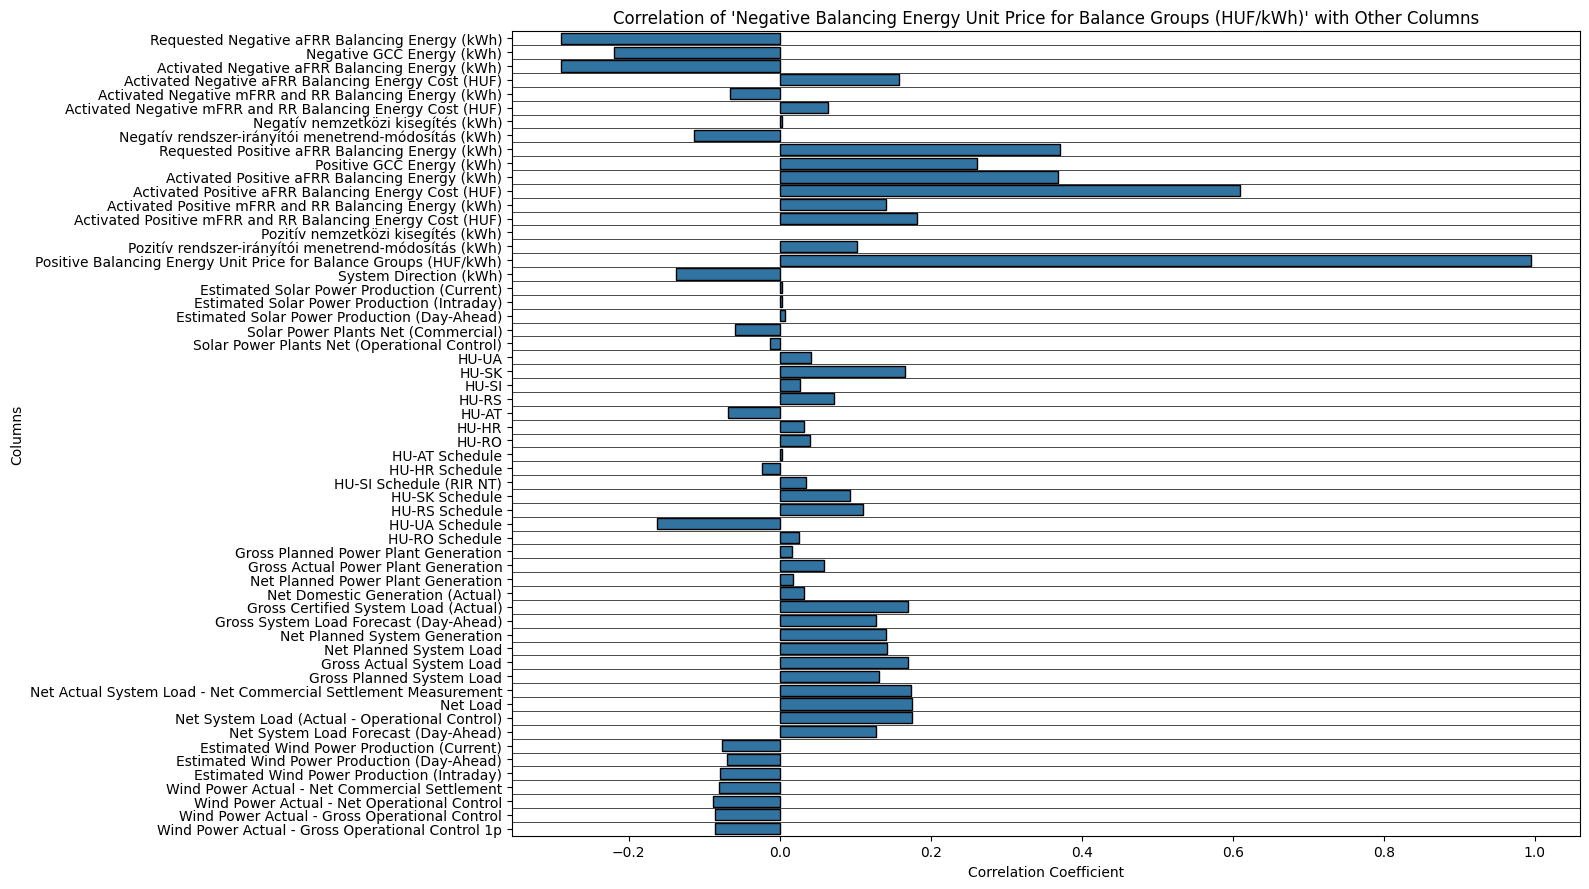

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix, excluding the 'Időpont' column
correlation_matrix = final_df.drop("Időpont").to_pandas().corr()

# Extract the correlations for 'Negatív Mérlegköri kiegyenlítő energia egységára (HUF/kWh)'
target_col = "Negative Balancing Energy Unit Price for Balance Groups (HUF/kWh)"
target_corr = correlation_matrix[target_col].drop(target_col)

# Plot the correlations with slim black lines separating each row
plt.figure(figsize=(16, 9))
sns.barplot(y=target_corr.index, x=target_corr.values, orient="h", edgecolor="black", linewidth=1)
plt.title(f"Correlation of '{target_col}' with Other Columns")
plt.xlabel("Correlation Coefficient")
plt.ylabel("Columns")
plt.tight_layout()

# Add horizontal lines between bars
for i in range(len(target_corr)):
    plt.axhline(i - 0.5, color="black", linewidth=0.5)

plt.show()

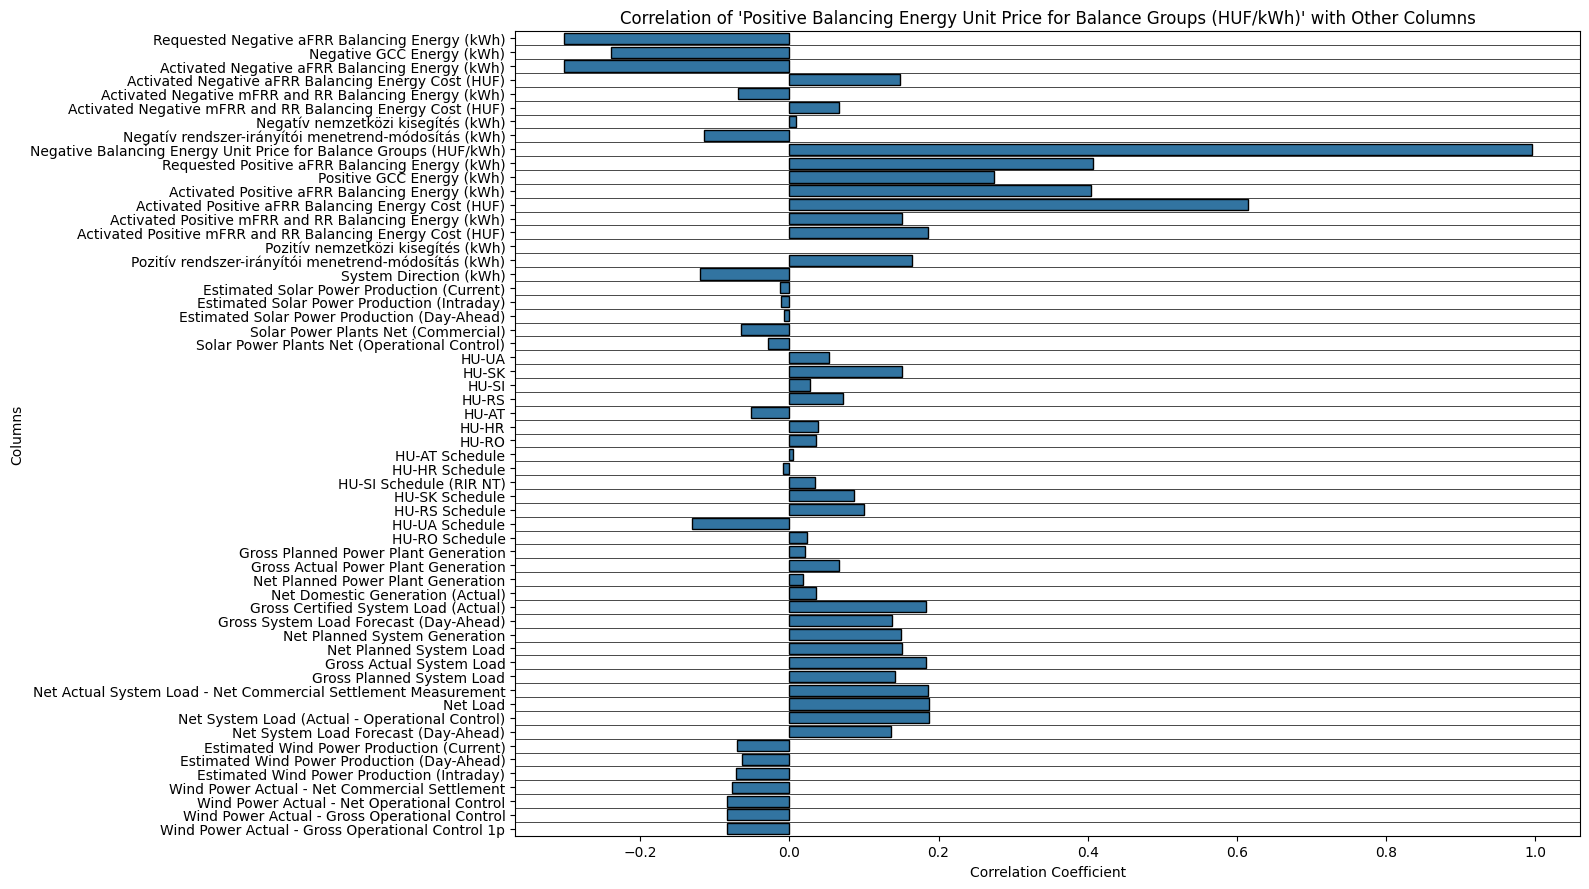

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix, excluding the 'Időpont' column
correlation_matrix = final_df.drop("Időpont").to_pandas().corr()

# Extract the correlations for 'Pozitív Mérlegköri kiegyenlítő energia egységára (HUF/kWh)'
target_col = "Positive Balancing Energy Unit Price for Balance Groups (HUF/kWh)"
target_corr = correlation_matrix[target_col].drop(target_col)

# Plot the correlations with slim black lines separating each row
plt.figure(figsize=(16, 9))
sns.barplot(y=target_corr.index, x=target_corr.values, orient="h", edgecolor="black", linewidth=1)
plt.title(f"Correlation of '{target_col}' with Other Columns")
plt.xlabel("Correlation Coefficient")
plt.ylabel("Columns")
plt.tight_layout()

# Add horizontal lines between bars
for i in range(len(target_corr)):
    plt.axhline(i - 0.5, color="black", linewidth=0.5)

plt.show()

In [15]:
print(final_df.columns)

['Időpont', 'Requested Negative aFRR Balancing Energy (kWh)', 'Negative GCC Energy (kWh)', 'Activated Negative aFRR Balancing Energy (kWh)', 'Activated Negative aFRR Balancing Energy Cost (HUF)', 'Activated Negative mFRR and RR Balancing Energy (kWh)', 'Activated Negative mFRR and RR Balancing Energy Cost (HUF)', 'Negatív nemzetközi kisegítés (kWh)', 'Negatív rendszer-irányítói menetrend-módosítás (kWh)', 'Negative Balancing Energy Unit Price for Balance Groups (HUF/kWh)', 'Requested Positive aFRR Balancing Energy (kWh)', 'Positive GCC Energy (kWh)', 'Activated Positive aFRR Balancing Energy (kWh)', 'Activated Positive aFRR Balancing Energy Cost (HUF)', 'Activated Positive mFRR and RR Balancing Energy (kWh)', 'Activated Positive mFRR and RR Balancing Energy Cost (HUF)', 'Pozitív nemzetközi kisegítés (kWh)', 'Pozitív rendszer-irányítói menetrend-módosítás (kWh)', 'Positive Balancing Energy Unit Price for Balance Groups (HUF/kWh)', 'System Direction (kWh)', 'Estimated Solar Power Product

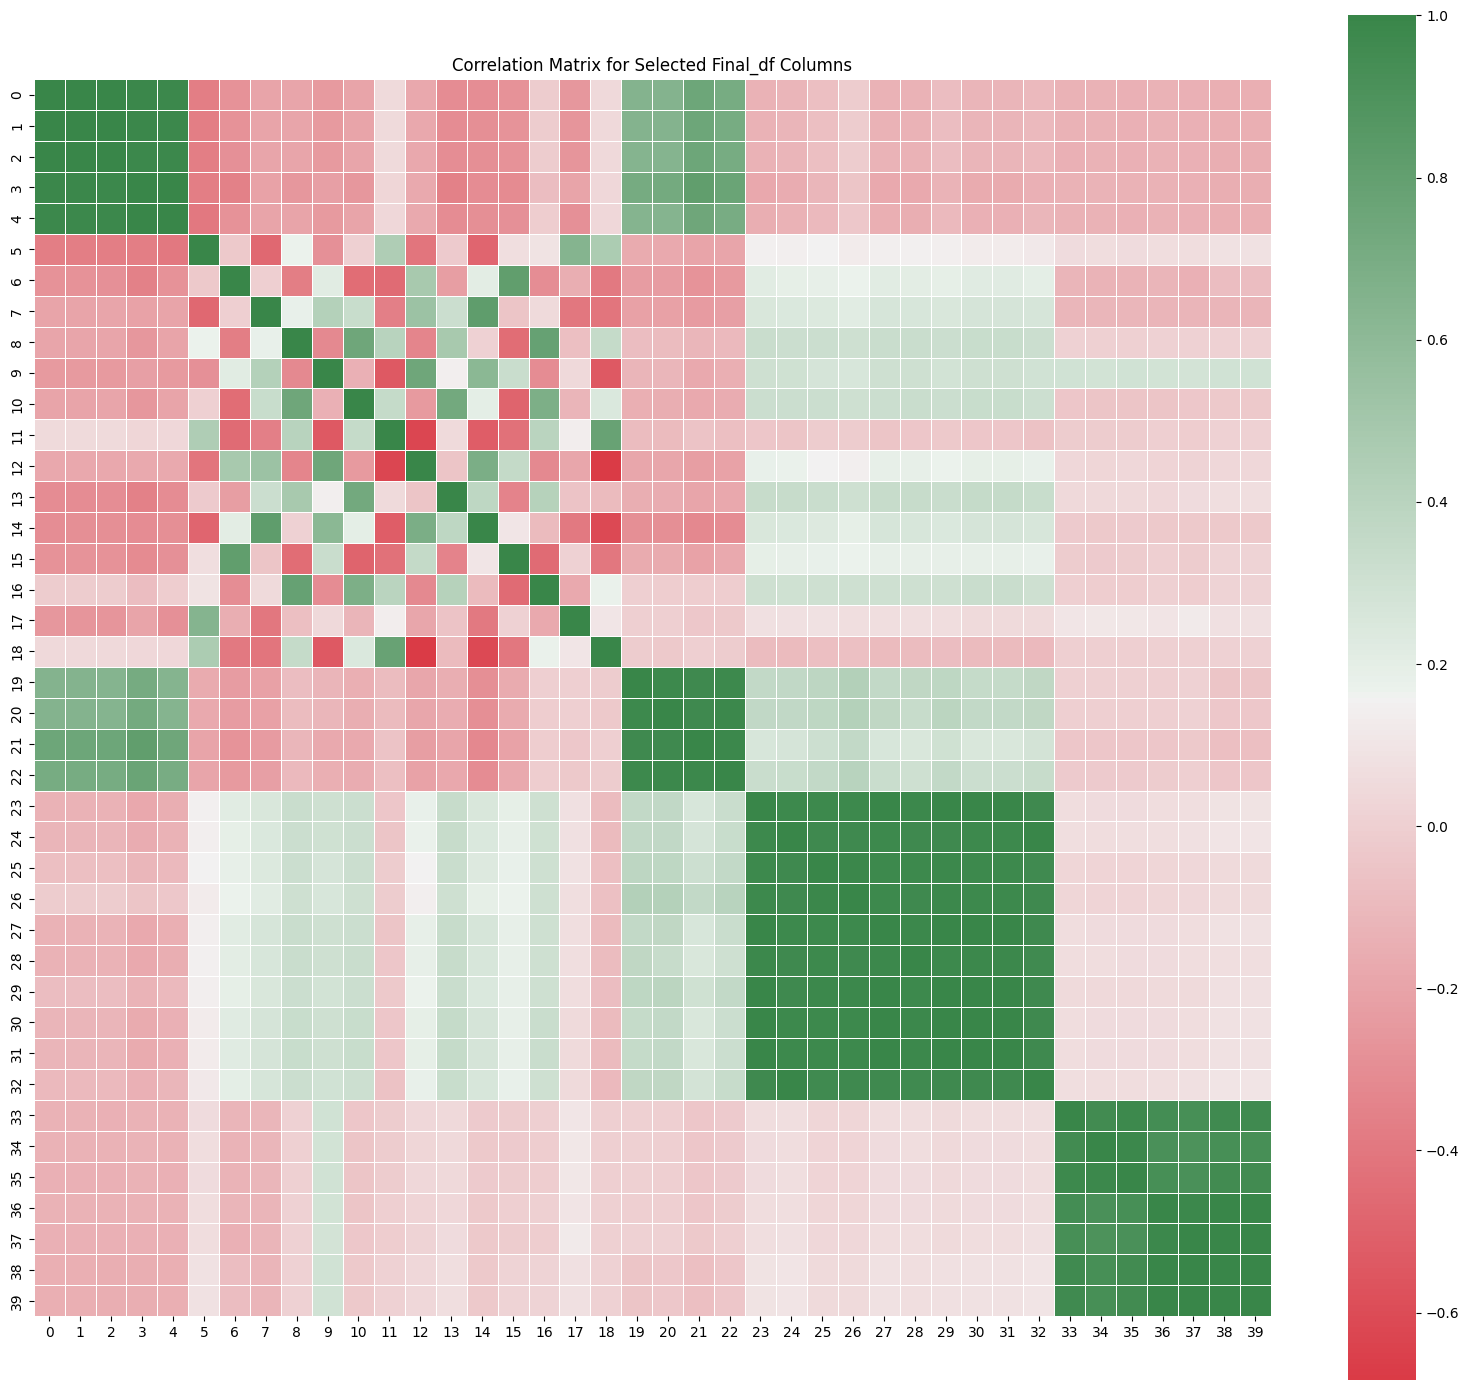

In [32]:
# List of columns to include in the correlation matrix
cols = [
    "Estimated Solar Power Production (Current)",
    "Estimated Solar Power Production (Intraday)",
    "Estimated Solar Power Production (Day-Ahead)",
    "Solar Power Plants Net (Commercial)",
    "Solar Power Plants Net (Operational Control)",
    "HU-UA",
    "HU-SK",
    "HU-SI",
    "HU-RS",
    "HU-AT",
    "HU-HR",
    "HU-RO",
    "HU-AT Schedule",
    "HU-HR Schedule",
    "HU-SI Schedule (RIR NT)",
    "HU-SK Schedule",
    "HU-RS Schedule",
    "HU-UA Schedule",
    "HU-RO Schedule",
    "Gross Planned Power Plant Generation",
    "Gross Actual Power Plant Generation",
    "Net Planned Power Plant Generation",
    "Net Domestic Generation (Actual)",
    "Gross Certified System Load (Actual)",
    "Gross System Load Forecast (Day-Ahead)",
    "Net Planned System Generation",
    "Net Planned System Load",
    "Gross Actual System Load",
    "Gross Planned System Load",
    "Net Actual System Load - Net Commercial Settlement Measurement",
    "Net Load",
    "Net System Load (Actual - Operational Control)",
    "Net System Load Forecast (Day-Ahead)",
    "Estimated Wind Power Production (Current)",
    "Estimated Wind Power Production (Day-Ahead)",
    "Estimated Wind Power Production (Intraday)",
    "Wind Power Actual - Net Commercial Settlement",
    "Wind Power Actual - Net Operational Control",
    "Wind Power Actual - Gross Operational Control",
    "Wind Power Actual - Gross Operational Control 1p",
]

idx_col = {c: i for i, c in enumerate(cols)}
# Filter final_df to get only the desired columns
final_df_subset = final_df.select(cols)

# Convert to a pandas DataFrame
df_corr = final_df_subset.to_pandas().corr()

# Plot the correlation heatmap
plt.figure(figsize=(16, 14))
sns.heatmap(
    df_corr,
    annot=False,
    cmap=sns.diverging_palette(10, 133, as_cmap=True),
    linewidths=0.5,
    xticklabels=idx_col.values(),
    yticklabels=idx_col.values(),
    square=True,
)
plt.title("Correlation Matrix for Selected Final_df Columns")
plt.tight_layout()
plt.show()

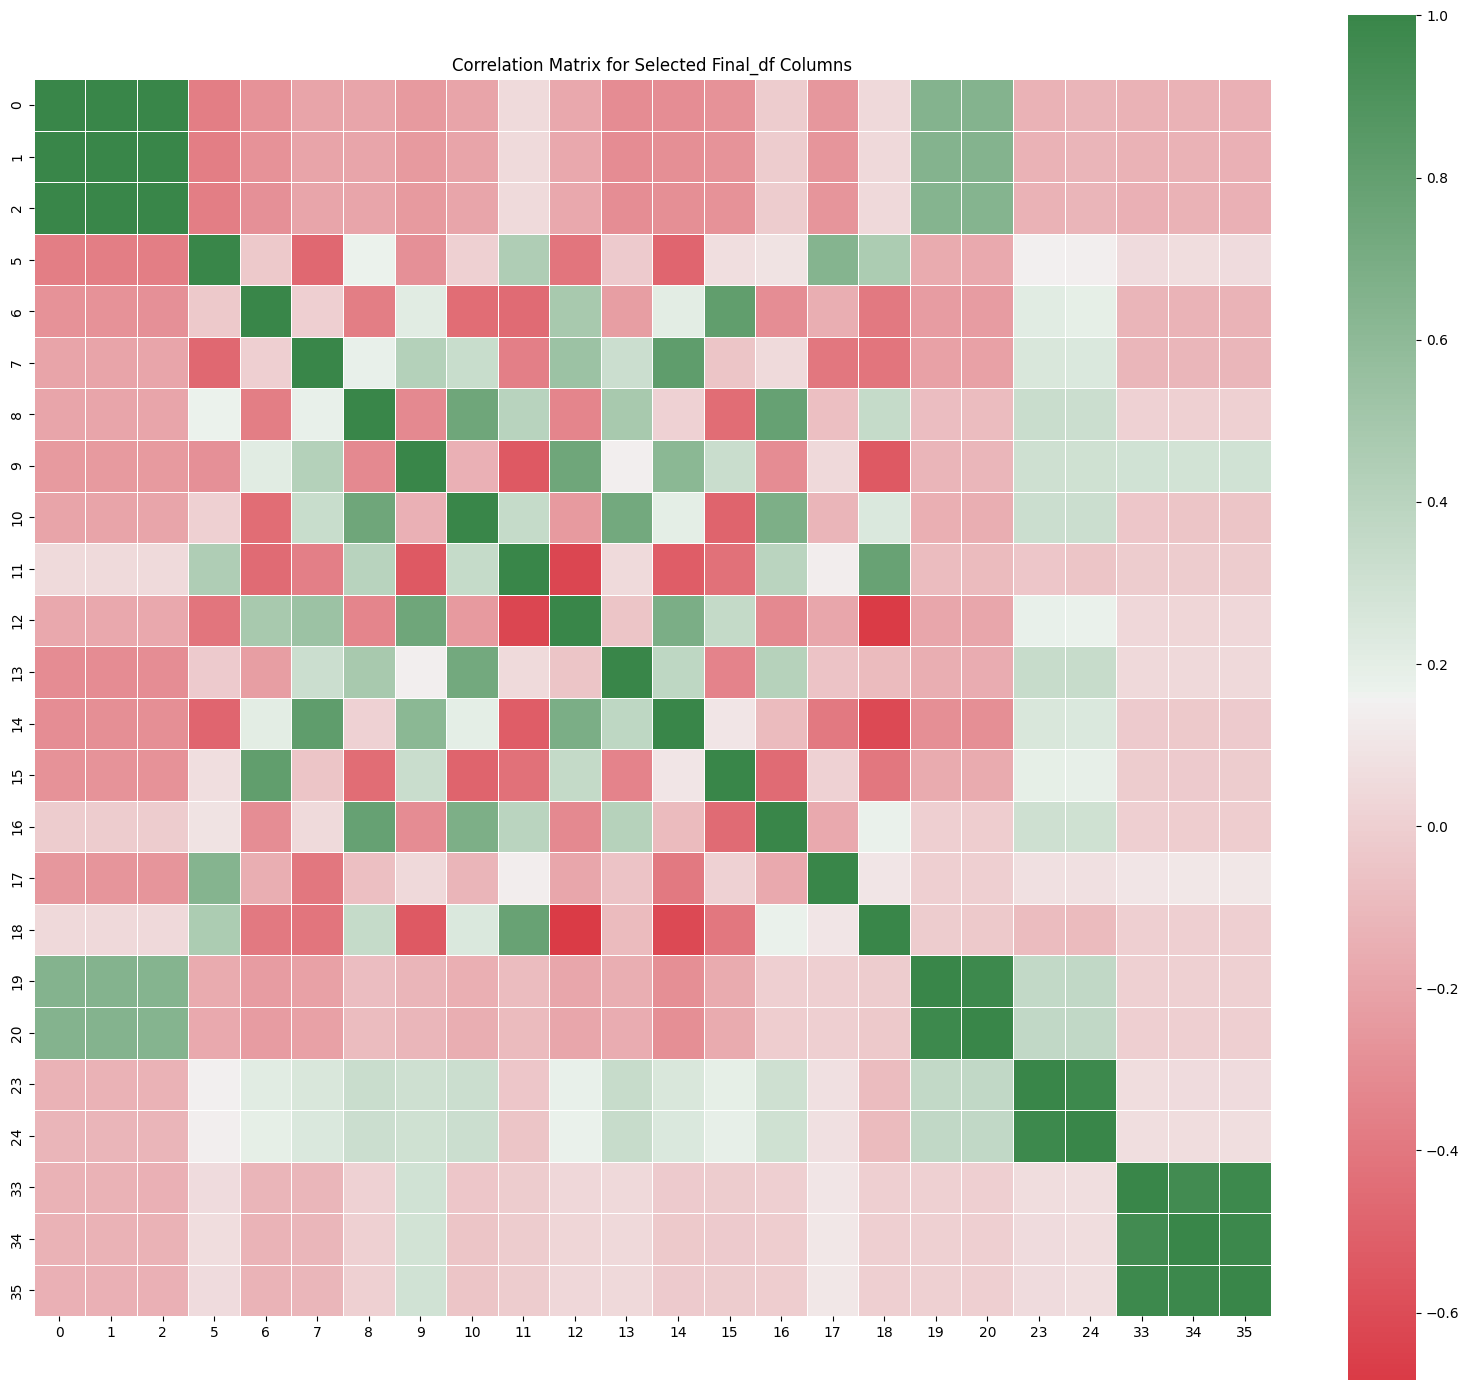

In [34]:
# 04/17 konzi után kivett oszlopokkal:
# List of columns to include in the correlation matrix
cols = [
    "Estimated Solar Power Production (Current)",
    "Estimated Solar Power Production (Intraday)",
    "Estimated Solar Power Production (Day-Ahead)",
    "HU-UA",
    "HU-SK",
    "HU-SI",
    "HU-RS",
    "HU-AT",
    "HU-HR",
    "HU-RO",
    "HU-AT Schedule",
    "HU-HR Schedule",
    "HU-SI Schedule (RIR NT)",
    "HU-SK Schedule",
    "HU-RS Schedule",
    "HU-UA Schedule",
    "HU-RO Schedule",
    "Gross Planned Power Plant Generation",
    "Gross Actual Power Plant Generation",
    "Gross Certified System Load (Actual)",
    "Gross System Load Forecast (Day-Ahead)",
    "Estimated Wind Power Production (Current)",
    "Estimated Wind Power Production (Day-Ahead)",
    "Estimated Wind Power Production (Intraday)",
]

# Filter final_df to get only the desired columns
final_df_subset = final_df.select(cols)

# Convert to a pandas DataFrame
df_corr = final_df_subset.to_pandas().corr()


num_labels = list(map(idx_col.get, cols))
# Plot the correlation heatmap
plt.figure(figsize=(16, 14))
sns.heatmap(
    df_corr,
    annot=False,
    cmap=sns.diverging_palette(10, 133, as_cmap=True),
    linewidths=0.5,
    xticklabels=num_labels,
    yticklabels=num_labels,
    square=True,
)
plt.title("Correlation Matrix for Selected Final_df Columns")
plt.tight_layout()
plt.show()

In [4]:
# List of columns to keep
keep_cols = [
    "Időpont",
    "Negatív Mérlegköri kiegyenlítő energia egységára (HUF/kWh)",
    "Pozitív Mérlegköri kiegyenlítő energia egységára (HUF/kWh)",
    "Rendszer-irány (kWh)",
    "Naperőművek becsült termelése (aktuális)",
    "Naperőművek becsült termelése (intraday)",
    "Naperőművek becsült termelése (dayahead)",
    "HU-UK",
    "HU-SK",
    # "HU-SI", too many NaN values
    "HU-RS",
    "HU-AT",
    "HU-HR",
    "HU-RO",
    "HU-AT menetrend",
    "HU-HR menetrend",
    # "HU-SI menetrend (RIR NT)", too many NaN values
    "HU-SK menetrend",
    "HU-RS menetrend",
    "HU-UK menetrend",
    "HU-RO menetrend",
    "Bruttó terv erőművi termelés",
    "Bruttó tény erőművi termelés",
    "Bruttó hitelesített rendszerterhelés tény",
    "Bruttó rendszerterhelés becslés (dayahead)",
    "Szélerőművek becsült termelése (aktuális)",
    "Szélerőművek becsült termelése (dayahead)",
    "Szélerőművek becsült termelése (intraday)",
]

# Filter the DataFrame to keep only the specified columns
final_df = final_df.select(keep_cols)
final_df
# 100-200 NaN max per col (out of 210k), just fill it
final_df = final_df.fill_null(strategy="forward")
# Define columns to create forward lags for
cols_10_h = [
    "Szélerőművek becsült termelése (aktuális)",
    "Szélerőművek becsült termelése (dayahead)",
    "Szélerőművek becsült termelése (intraday)",
    "Naperőművek becsült termelése (aktuális)",
    "Naperőművek becsült termelése (intraday)",
    "Naperőművek becsült termelése (dayahead)",
]

# Max number of 15-minute steps (10 hours)
max_ahead = 40

# Collect all new columns
new_cols = []

for col in cols_10_h:
    for i in range(1, max_ahead + 1):
        new_col_name = f"{col}_t+{i*15}min"
        new_cols.append(pl.col(col).shift(-i).alias(new_col_name))

# Apply with_columns to add all new forward lags
final_df = final_df.with_columns(new_cols)
# Define columns to create forward lags for
cols_12_h = [
    "Bruttó terv erőművi termelés",
    "Bruttó rendszerterhelés becslés (dayahead)",
    "HU-AT menetrend",
    "HU-HR menetrend",
    # "HU-SI menetrend (RIR NT)",
    "HU-SK menetrend",
    "HU-RS menetrend",
    "HU-UK menetrend",
    "HU-RO menetrend",
]

# Max number of 15-minute steps (12 hours)
max_ahead = 48

# Collect all new columns
new_cols = []

for col in cols_12_h:
    for i in range(1, max_ahead + 1):
        new_col_name = f"{col}_t+{i*15}min"
        new_cols.append(pl.col(col).shift(-i).alias(new_col_name))

# Apply with_columns to add all new forward lags
final_df = final_df.with_columns(new_cols)
# Targets to forecast
target_cols = [
    "Negatív Mérlegköri kiegyenlítő energia egységára (HUF/kWh)",
    "Pozitív Mérlegköri kiegyenlítő energia egységára (HUF/kWh)",
    "Rendszer-irány (kWh)",
]

# 15-minute steps for 4h to 5h ahead (i.e., 16 to 20 steps)
ahead_steps = range(16, 21)

# Create forward lag columns
target_future_cols = []

for col in target_cols:
    for i in ahead_steps:
        new_col = f"{col}_t+{i*15}min"
        target_future_cols.append(pl.col(col).shift(-i).alias(new_col))

# Apply to dataframe
final_df = final_df.with_columns(target_future_cols)
# Remove the last 48 rows (12 hours) from the final_df, since forward lags cause NaN values
final_df = final_df.slice(0, final_df.height - 48)
final_df

shape: (210_431, 665)
┌───────────┬───────────┬───────────┬───────────┬───┬───────────┬───────────┬───────────┬──────────┐
│ Időpont   ┆ Negatív   ┆ Pozitív   ┆ Rendszer- ┆ … ┆ Rendszer- ┆ Rendszer- ┆ Rendszer- ┆ Rendszer │
│ ---       ┆ Mérlegkör ┆ Mérlegkör ┆ irány     ┆   ┆ irány (kW ┆ irány (kW ┆ irány (kW ┆ -irány   │
│ datetime[ ┆ i kiegyen ┆ i kiegyen ┆ (kWh)     ┆   ┆ h)_t+255m ┆ h)_t+270m ┆ h)_t+285m ┆ (kWh)_t+ │
│ μs, Europ ┆ lítő…     ┆ lítő…     ┆ ---       ┆   ┆ in        ┆ in        ┆ in        ┆ 300min   │
│ e/Budapes ┆ ---       ┆ ---       ┆ f64       ┆   ┆ ---       ┆ ---       ┆ ---       ┆ ---      │
│ t]        ┆ f64       ┆ f64       ┆           ┆   ┆ f64       ┆ f64       ┆ f64       ┆ f64      │
╞═══════════╪═══════════╪═══════════╪═══════════╪═══╪═══════════╪═══════════╪═══════════╪══════════╡
│ 2019-01-0 ┆ 25.19219  ┆ 41.10305  ┆ 13527.42  ┆ … ┆ 18329.42  ┆ 18323.33  ┆ 13557.67  ┆ 18052.58 │
│ 1         ┆           ┆           ┆           ┆   ┆           ┆           ┆           ┆          │
│ 00:15:00  ┆           ┆           ┆           ┆   ┆           ┆           ┆           ┆          │
│ CET       ┆           ┆           ┆           ┆   ┆           ┆           ┆           ┆          │
│ 2019-01-0 ┆ 21.80806  ┆ 35.58158  ┆ 10456.08  ┆ … ┆ 18323.33  ┆ 13557.67  ┆ 18052.58  ┆ 17029.25 │
│ 1         ┆           ┆           ┆           ┆   ┆           ┆           ┆           ┆          │
│ 00:30:00  ┆           ┆           ┆           ┆   ┆           ┆           ┆           ┆          │
│ CET       ┆           ┆           ┆           ┆   ┆           ┆           ┆           ┆          │
│ 2019-01-0 ┆ 21.43053  ┆ 34.96561  ┆ 13429.33  ┆ … ┆ 13557.67  ┆ 18052.58  ┆ 17029.25  ┆ 12500.75 │
│ 1         ┆           ┆           ┆           ┆   ┆           ┆           ┆           ┆          │
│ 00:45:00  ┆           ┆           ┆           ┆   ┆           ┆           ┆           ┆          │
│ CET       ┆           ┆           ┆           ┆   ┆           ┆           ┆           ┆          │
│ 2019-01-0 ┆ 24.30898  ┆ 39.66202  ┆ 40005.25  ┆ … ┆ 18052.58  ┆ 17029.25  ┆ 12500.75  ┆ 5098.33  │
│ 1         ┆           ┆           ┆           ┆   ┆           ┆           ┆           ┆          │
│ 01:00:00  ┆           ┆           ┆           ┆   ┆           ┆           ┆           ┆          │
│ CET       ┆           ┆           ┆           ┆   ┆           ┆           ┆           ┆          │
│ 2019-01-0 ┆ 21.27939  ┆ 34.71901  ┆ 31994.25  ┆ … ┆ 17029.25  ┆ 12500.75  ┆ 5098.33   ┆ 5678.58  │
│ 1         ┆           ┆           ┆           ┆   ┆           ┆           ┆           ┆          │
│ 01:15:00  ┆           ┆           ┆           ┆   ┆           ┆           ┆           ┆          │
│ CET       ┆           ┆           ┆           ┆   ┆           ┆           ┆           ┆          │
│ …         ┆ …         ┆ …         ┆ …         ┆ … ┆ …         ┆ …         ┆ …         ┆ …        │
│ 2024-12-3 ┆ 94.5447   ┆ 94.5447   ┆ -7463.583 ┆ … ┆ -33338.25 ┆ -27891.0  ┆ -32586.5  ┆ -37439.4 │
│ 1         ┆           ┆           ┆ 33        ┆   ┆           ┆           ┆           ┆ 1667     │
│ 10:45:00  ┆           ┆           ┆           ┆   ┆           ┆           ┆           ┆          │
│ CET       ┆           ┆           ┆           ┆   ┆           ┆           ┆           ┆          │
│ 2024-12-3 ┆ 100.29151 ┆ 100.29151 ┆ -17744.08 ┆ … ┆ -27891.0  ┆ -32586.5  ┆ -37439.41 ┆ -22593.4 │
│ 1         ┆           ┆           ┆ 333       ┆   ┆           ┆           ┆ 667       ┆ 1667     │
│ 11:00:00  ┆           ┆           ┆           ┆   ┆           ┆           ┆           ┆          │
│ CET       ┆           ┆           ┆           ┆   ┆           ┆           ┆           ┆          │
│ 2024-12-3 ┆ 101.40408 ┆ 101.40408 ┆ -15023.16 ┆ … ┆ -32586.5  ┆ -37439.41 ┆ -22593.41 ┆ -19580.7 │
│ 1         ┆           ┆           ┆ 667       ┆   ┆           ┆ 667       ┆ 667       ┆ 5        │
│ 11:15:00  ┆           ┆           ┆  

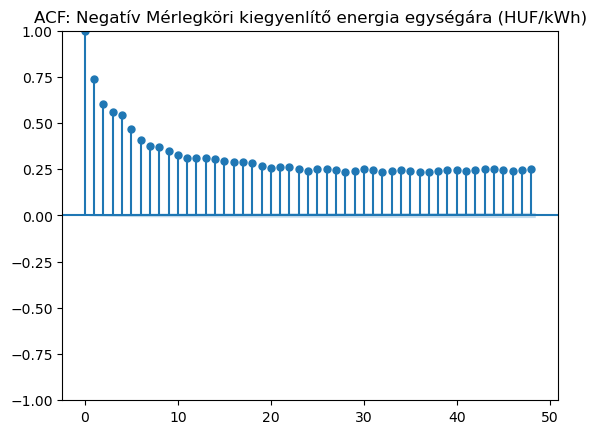

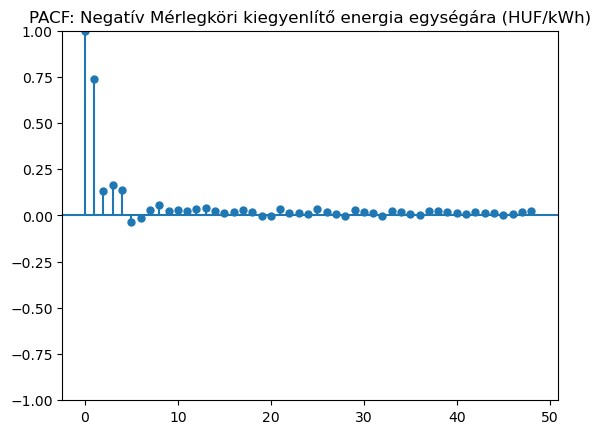

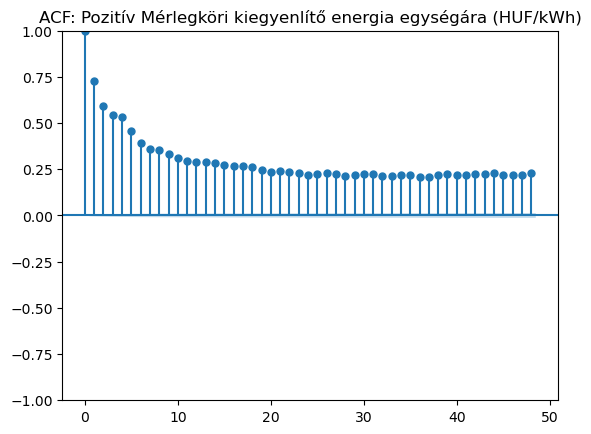

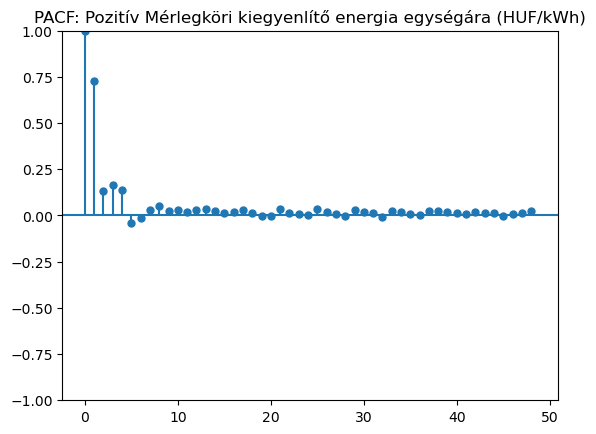

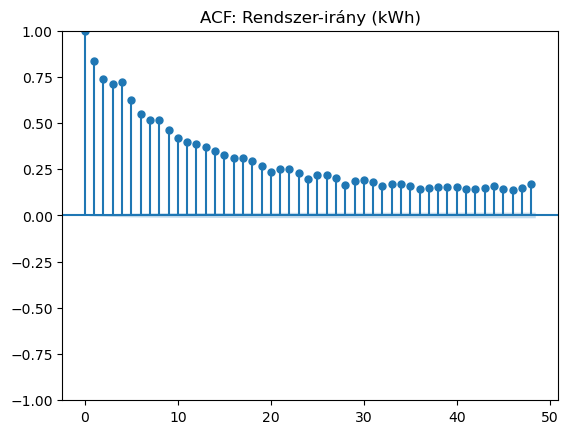

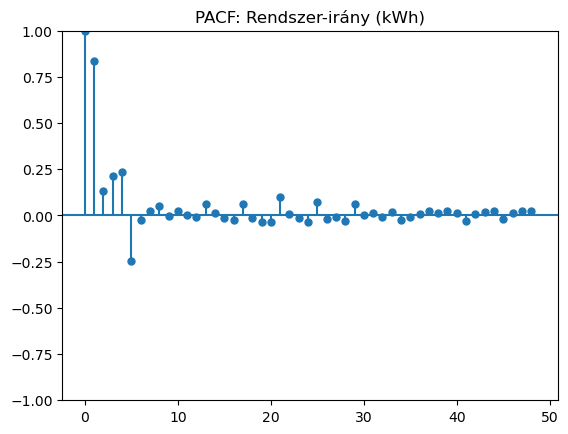

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

for col in target_cols:
    series = final_df[col].to_pandas().dropna()
    plot_acf(series, lags=48, title=f"ACF: {col}")
    plot_pacf(series, lags=48, title=f"PACF: {col}")
    plt.show()

In [5]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller, grangercausalitytests

# Convert Polars to pandas
df = final_df.to_pandas()

# Set datetime index
df["Időpont"] = pd.to_datetime(df["Időpont"])
df = df.set_index("Időpont").sort_index()

# 1. Identify target lagged columns
base_targets = [
    "Negatív Mérlegköri kiegyenlítő energia egységára (HUF/kWh)",
    "Pozitív Mérlegköri kiegyenlítő energia egységára (HUF/kWh)",
    "Rendszer-irány (kWh)",
]
target_lags_min = [240, 255, 270, 285, 300]  # 16–20 steps of 15 mins

target_cols = [f"{base}_t+{lag}min" for base in base_targets for lag in target_lags_min]

# 2. Define predictors: all other non-lagged columns (excluding targets and their lags)
predictors = [col for col in df.columns if col not in target_cols and not any(f"_t+" in col for col in [col])]

In [128]:
# # 3. ADF Test
# print("=== ADF TESTS ===")
# stationarity = {}
# for col in predictors + target_cols:
#     try:
#         pval = adfuller(df[col].dropna())[1]
#         stationarity[col] = pval
#         status = "Stationary" if pval < 0.05 else "Non-stationary"
#         print(f"{col[:55]:<55} | p = {pval:.4f} → {status}")
#     except Exception as e:
#         print(f"{col[:55]:<55} | ADF Error: {e}")

=== ADF TESTS ===
Negatív Mérlegköri kiegyenlítő energia egységára (HUF/k | p = 0.0000 → Stationary
Pozitív Mérlegköri kiegyenlítő energia egységára (HUF/k | p = 0.0000 → Stationary
Rendszer-irány (kWh)                                    | p = 0.0000 → Stationary
Naperőművek becsült termelése (aktuális)                | p = 0.0000 → Stationary
Naperőművek becsült termelése (intraday)                | p = 0.0000 → Stationary
Naperőművek becsült termelése (dayahead)                | p = 0.0000 → Stationary
HU-UK                                                   | p = 0.0000 → Stationary
HU-SK                                                   | p = 0.0000 → Stationary
HU-SI                                                   | p = 0.0000 → Stationary
HU-RS                                                   | p = 0.0000 → Stationary
HU-AT                                                   | p = 0.0000 → Stationary
HU-HR                                                   | p = 0.0000 → Stationary
HU-RO                                                   | p = 0.0000 → Stationary
HU-AT menetrend                                         | p = 0.0000 → Stationary
HU-HR menetrend                                         | p = 0.0000 → Stationary
HU-SI menetrend (RIR NT)                                | p = 0.0000 → Stationary
HU-SK menetrend                                         | p = 0.0000 → Stationary
HU-RS menetrend                                         | p = 0.0000 → Stationary
HU-UK menetrend                                         | p = 0.0000 → Stationary
HU-RO menetrend                                         | p = 0.0000 → Stationary
Bruttó terv erőművi termelés                            | p = 0.0000 → Stationary
Bruttó tény erőművi termelés                            | p = 0.0000 → Stationary
Bruttó hitelesített rendszerterhelés tény               | p = 0.0000 → Stationary
Bruttó rendszerterhelés becslés (dayahead)              | p = 0.0000 → Stationary
Szélerőművek becsült termelése (aktuális)               | p = 0.0000 → Stationary
Szélerőművek becsült termelése (dayahead)               | p = 0.0000 → Stationary
Szélerőművek becsült termelése (intraday)               | p = 0.0000 → Stationary
Negatív Mérlegköri kiegyenlítő energia egységára (HUF/k | p = 0.0000 → Stationary
Negatív Mérlegköri kiegyenlítő energia egységára (HUF/k | p = 0.0000 → Stationary
Negatív Mérlegköri kiegyenlítő energia egységára (HUF/k | p = 0.0000 → Stationary
Negatív Mérlegköri kiegyenlítő energia egységára (HUF/k | p = 0.0000 → Stationary
Negatív Mérlegköri kiegyenlítő energia egységára (HUF/k | p = 0.0000 → Stationary
Pozitív Mérlegköri kiegyenlítő energia egységára (HUF/k | p = 0.0000 → Stationary
Pozitív Mérlegköri kiegyenlítő energia egységára (HUF/k | p = 0.0000 → Stationary
Pozitív Mérlegköri kiegyenlítő energia egységára (HUF/k | p = 0.0000 → Stationary
Pozitív Mérlegköri kiegyenlítő energia egységára (HUF/k | p = 0.0000 → Stationary
Pozitív Mérlegköri kiegyenlítő energia egységára (HUF/k | p = 0.0000 → Stationary
Rendszer-irány (kWh)_t+240min                           | p = 0.0000 → Stationary
Rendszer-irány (kWh)_t+255min                           | p = 0.0000 → Stationary
Rendszer-irány (kWh)_t+270min                           | p = 0.0000 → Stationary
Rendszer-irány (kWh)_t+285min                           | p = 0.0000 → Stationary
Rendszer-irány (kWh)_t+300min                           | p = 0.0000 → Stationary

# 4. Granger Causality Test (lag=4)
print("\n=== GRANGER CAUSALITY TESTS (lag=4) ===")
granger_results = {target: {} for target in target_cols}
max_lag = 4

for target in target_cols:
    print(f"\nTarget: {target}")
    for predictor in predictors:
        try:
            test_df = df[[target, predictor]].dropna()
            if len(test_df) > max_lag + 1:
                test_result = grangercausalitytests(test_df, maxlag=max_lag)
                min_pval = min([test_result[lag][0]["ssr_chi2test"][1] for lag in test_result])
                granger_results[target][predictor] = min_pval
                if min_pval < 0.05:
                    print(f"  {predictor[:40]:<40} → p = {min_pval:.4f} *** Granger-causal")
                else:
                    print(f"  {predictor[:40]:<40} → p = {min_pval:.4f} NOT Granger-causal")
        except Exception as e:
            print(f"  {predictor[:40]:<40} → Error: {e}")

In [6]:
# Count total number of NaNs per column
nan_counts = final_df.select([pl.col(col).is_null().sum().alias(f"{col}_NaNs") for col in final_df.columns])

# Show total NaNs per column
print(nan_counts)

shape: (1, 665)
┌───────────┬───────────┬───────────┬───────────┬───┬───────────┬───────────┬───────────┬──────────┐
│ Időpont_N ┆ Negatív   ┆ Pozitív   ┆ Rendszer- ┆ … ┆ Rendszer- ┆ Rendszer- ┆ Rendszer- ┆ Rendszer │
│ aNs       ┆ Mérlegkör ┆ Mérlegkör ┆ irány (kW ┆   ┆ irány (kW ┆ irány (kW ┆ irány (kW ┆ -irány   │
│ ---       ┆ i kiegyen ┆ i kiegyen ┆ h)_NaNs   ┆   ┆ h)_t+255m ┆ h)_t+270m ┆ h)_t+285m ┆ (kWh)_t+ │
│ u32       ┆ lítő…     ┆ lítő…     ┆ ---       ┆   ┆ in_…      ┆ in_…      ┆ in_…      ┆ 300min_… │
│           ┆ ---       ┆ ---       ┆ u32       ┆   ┆ ---       ┆ ---       ┆ ---       ┆ ---      │
│           ┆ u32       ┆ u32       ┆           ┆   ┆ u32       ┆ u32       ┆ u32       ┆ u32      │
╞═══════════╪═══════════╪═══════════╪═══════════╪═══╪═══════════╪═══════════╪═══════════╪══════════╡
│ 0         ┆ 0         ┆ 0         ┆ 0         ┆ … ┆ 0         ┆ 0         ┆ 0         ┆ 0        │
└───────────┴───────────┴───────────┴───────────┴───┴───────────┴──────────

In [1]:
import pandas as pd
import polars as pl
from sklearn.model_selection import train_test_split
from sklearn.metrics import root_mean_squared_error, mean_absolute_error, r2_score
import xgboost as xgb
import statsmodels.api as sm
import numpy as np

In [ ]:
from preprocess_dataset_for_training import create_training_data

joined_df = pl.read_parquet("data/joined_df.parquet")
X, y = create_training_data(joined_df)
y

shape: (210_391, 15)
┌───────────┬───────────┬───────────┬───────────┬───┬───────────┬───────────┬───────────┬──────────┐
│ Negatív   ┆ Pozitív   ┆ Rendszer- ┆ Negatív   ┆ … ┆ Rendszer- ┆ Negatív   ┆ Pozitív   ┆ Rendszer │
│ Mérlegkör ┆ Mérlegkör ┆ irány (kW ┆ Mérlegkör ┆   ┆ irány (kW ┆ Mérlegkör ┆ Mérlegkör ┆ -irány   │
│ i kiegyen ┆ i kiegyen ┆ h)_t+240m ┆ i kiegyen ┆   ┆ h)_t+285m ┆ i kiegyen ┆ i kiegyen ┆ (kWh)_t+ │
│ lítő…     ┆ lítő…     ┆ in        ┆ lítő…     ┆   ┆ in        ┆ lítő…     ┆ lítő…     ┆ 300min   │
│ ---       ┆ ---       ┆ ---       ┆ ---       ┆   ┆ ---       ┆ ---       ┆ ---       ┆ ---      │
│ f64       ┆ f64       ┆ f64       ┆ f64       ┆   ┆ f64       ┆ f64       ┆ f64       ┆ f64      │
╞═══════════╪═══════════╪═══════════╪═══════════╪═══╪═══════════╪═══════════╪═══════════╪══════════╡
│ 24.17198  ┆ 39.43849  ┆ 15123.83  ┆ 23.60712  ┆ … ┆ -13976.5  ┆ 3.49512   ┆ 5.70257   ┆ -6077.42 │
│ 23.60712  ┆ 38.51688  ┆ 14764.67  ┆ 24.80155  ┆ … ┆ -6077.42  ┆ 27.885    ┆ 45.49658  ┆ 2516.42  │
│ 24.80155  ┆ 40.46569  ┆ 7149.33   ┆ 3.20021   ┆ … ┆ 2516.42   ┆ 23.65367  ┆ 38.59283  ┆ 13829.08 │
│ 3.20021   ┆ 5.2214    ┆ -13976.5  ┆ 3.49512   ┆ … ┆ 13829.08  ┆ 3.17945   ┆ 5.18752   ┆ -28613.7 │
│           ┆           ┆           ┆           ┆   ┆           ┆           ┆           ┆ 5        │
│ 3.49512   ┆ 5.70257   ┆ -6077.42  ┆ 27.885    ┆ … ┆ -28613.75 ┆ 3.23381   ┆ 5.27622   ┆ -10917.4 │
│           ┆           ┆           ┆           ┆   ┆           ┆           ┆           ┆ 2        │
│ …         ┆ …         ┆ …         ┆ …         ┆ … ┆ …         ┆ …         ┆ …         ┆ …        │
│ 220.12873 ┆ 220.12873 ┆ -35139.58 ┆ 243.84265 ┆ … ┆ -32586.5  ┆ 347.72525 ┆ 347.72525 ┆ -37439.4 │
│           ┆           ┆ 333       ┆           ┆   ┆           ┆           ┆           ┆ 1667     │
│ 243.84265 ┆ 243.84265 ┆ -33338.25 ┆ 208.49996 ┆ … ┆ -37439.41 ┆ 679.13146 ┆ 679.13146 ┆ -22593.4 │
│           ┆           ┆           ┆           ┆   ┆ 667       ┆           ┆           ┆ 1667     │
│ 208.49996 ┆ 208.49996 ┆ -27891.0  ┆ 279.25912 ┆ … ┆ -22593.41 ┆ 430.35668 ┆ 430.35668 ┆ -19580.7 │
│           ┆           ┆           ┆           ┆   ┆ 667       ┆           ┆           ┆ 5        │
│ 279.25912 ┆ 279.25912 ┆ -32586.5  ┆ 347.72525 ┆ … ┆ -19580.75 ┆ 1052.4430 ┆ 1052.4430 ┆ -37745.4 │
│           ┆           ┆           ┆           ┆   ┆           ┆ 9         ┆ 9         ┆ 1667     │
│ 347.72525 ┆ 347.72525 ┆ -37439.41 ┆ 679.13146 ┆ … ┆ -37745.41 ┆ 1232.1163 ┆ 1232.1163 ┆ -40206.6 │
│           ┆           ┆ 667       ┆           ┆   ┆ 667       ┆ 8         ┆ 8         ┆ 6667     │
└───────────┴───────────┴───────────┴───────────┴───┴───────────┴───────────┴───────────┴──────────┘

In [ ]:
from preprocess_dataset_for_training import create_training_data
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor
import pandas as pd
import polars as pl
from sklearn.model_selection import train_test_split
from sklearn.metrics import root_mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt


joined_df = pl.read_parquet("data/joined_df.parquet")
X, y = create_training_data(joined_df)

results = []

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Scale
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Fit XGBoost
model = XGBRegressor(n_estimators=200, learning_rate=0.1, random_state=42, n_jobs=-1, tree_method="approx")
model.fit(X_train_scaled, y_train)

# Multi-target predictions: shape (n_samples, n_targets)
y_pred = model.predict(X_test_scaled)

results = []
# Iterate over target columns
for idx, col in enumerate(y_test.columns):
    rmse = root_mean_squared_error(y_test[col], y_pred[:, idx])
    mae = mean_absolute_error(y_test[col], y_pred[:, idx])
    r2 = r2_score(y_test[col], y_pred[:, idx])

    plt.figure(figsize=(15, 5))
    plt.plot(y_test[col][-288:], label="True")
    plt.plot(y_pred[-288:, idx], label="Predicted")
    plt.title(f"Last 288 Predictions vs True Values, {col}")
    plt.xlabel("Time Steps")
    plt.ylabel("Target Value")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    results.append({"Target": col, "RMSE": rmse, "MAE": mae, "R²": r2})

results_df = pd.DataFrame(results)
display(results_df)

: 

: 

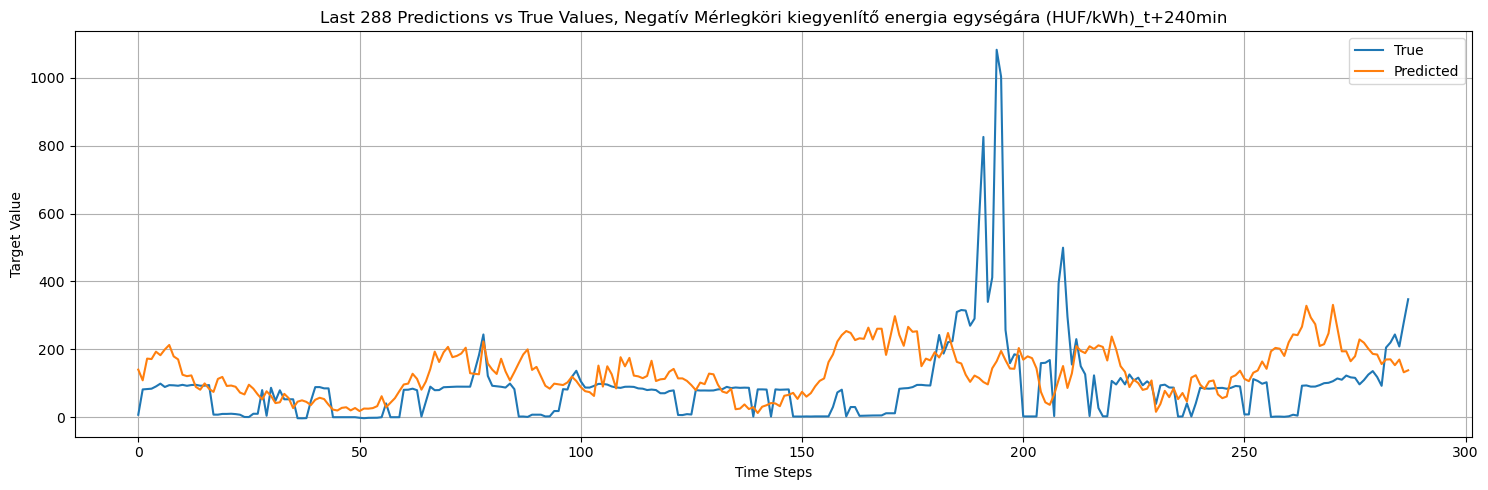

rmse: 121.86551440553109
mae: 88.4709750012389
r2: -0.6015512943267822


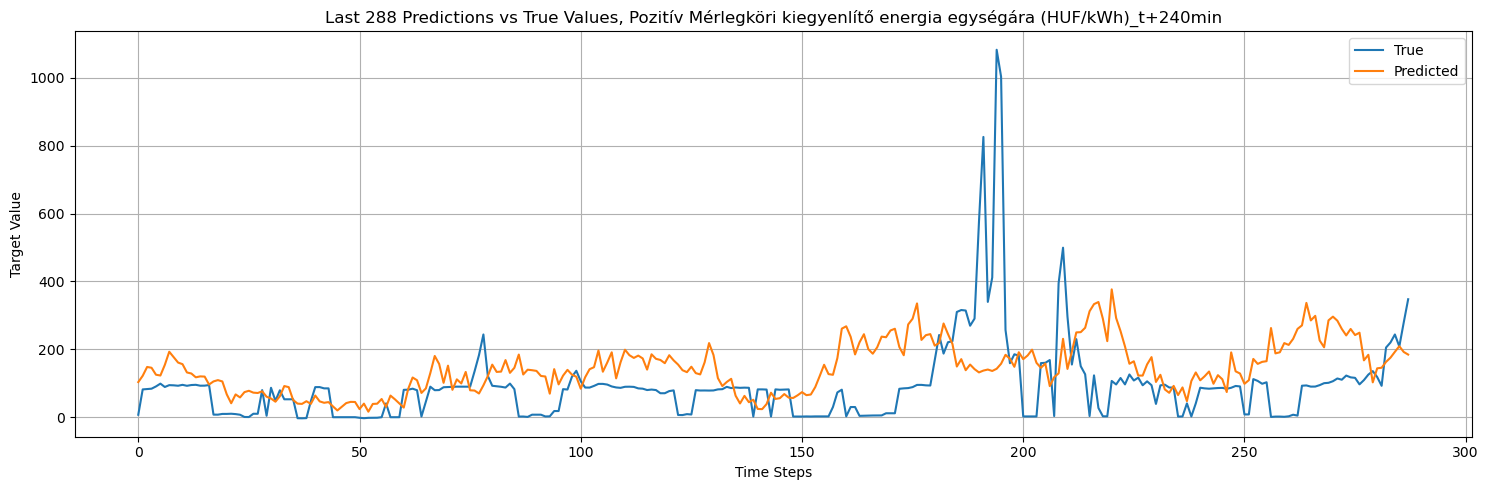

rmse: 124.56681461152553
mae: 91.19751460375792
r2: -0.6733390092849731


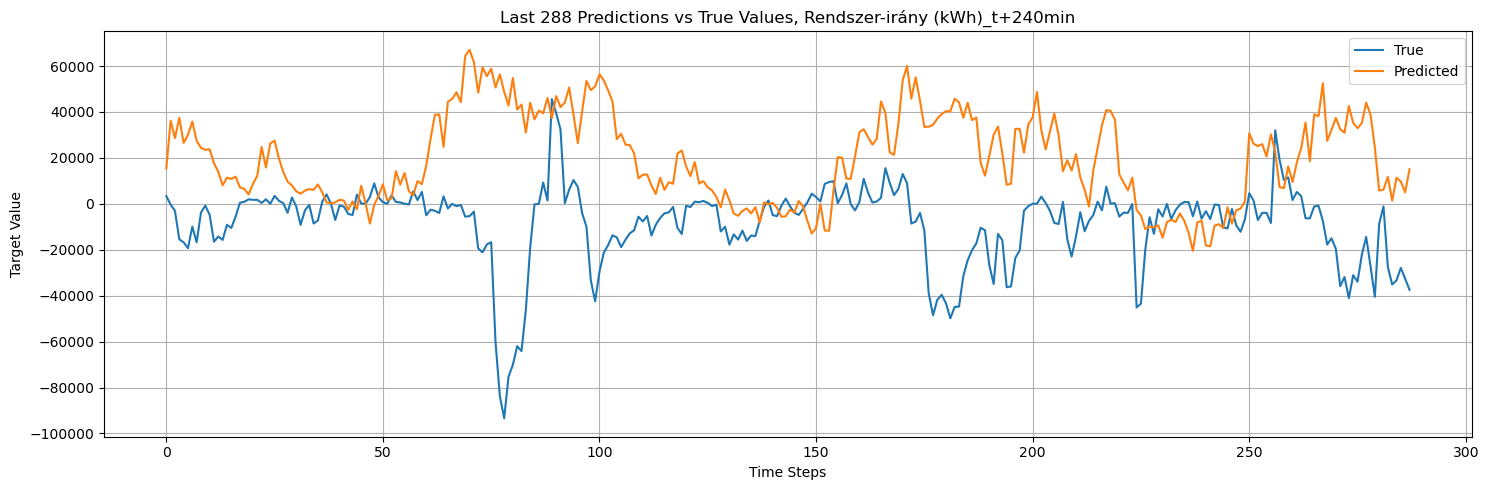

rmse: 28349.627070867267
mae: 18222.743533391742
r2: -0.07236063480377197


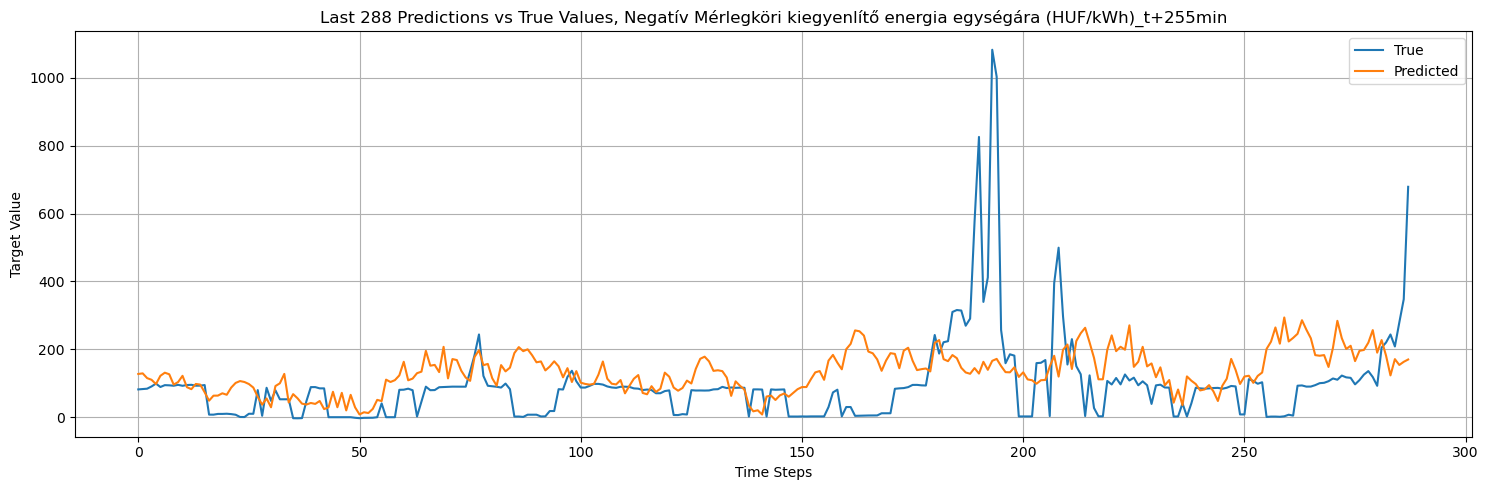

rmse: 126.6375623772649
mae: 93.1337258808241
r2: -0.7276695966720581


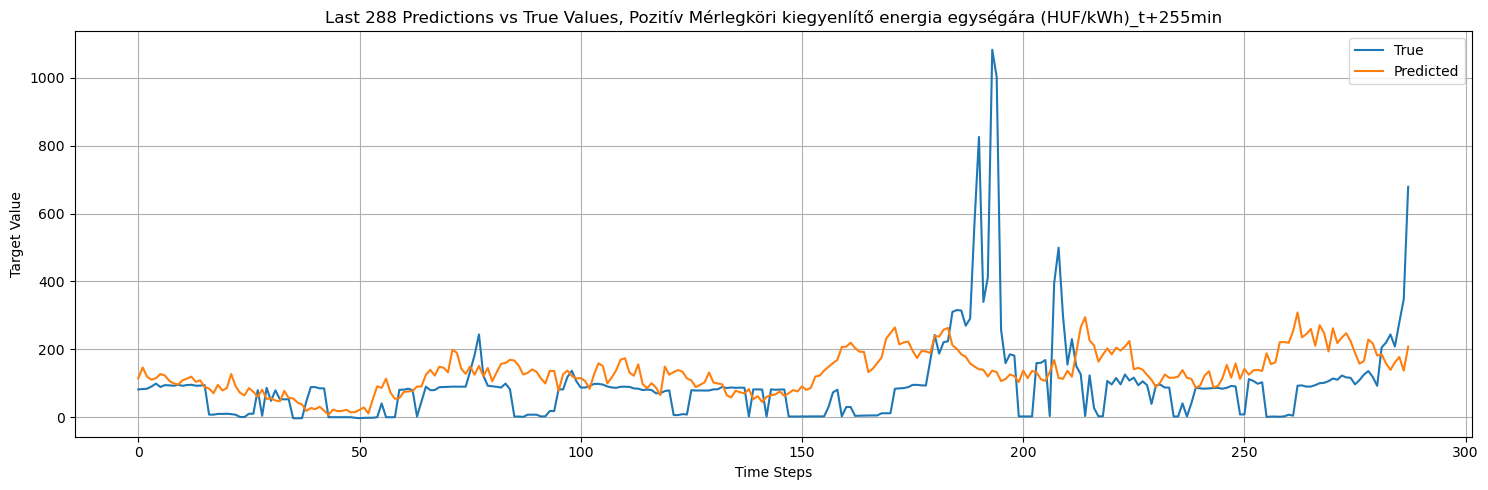

rmse: 125.27547956886738
mae: 91.64358164045754
r2: -0.6907045841217041


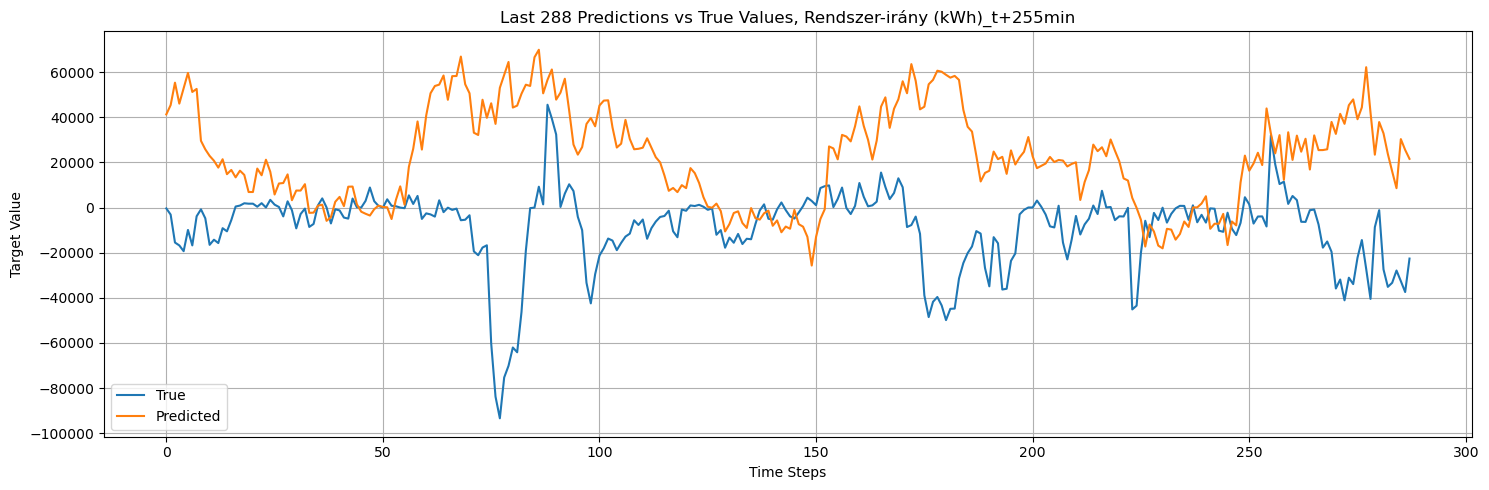

rmse: 28366.774739815464
mae: 18075.575428776378
r2: -0.07378137111663818


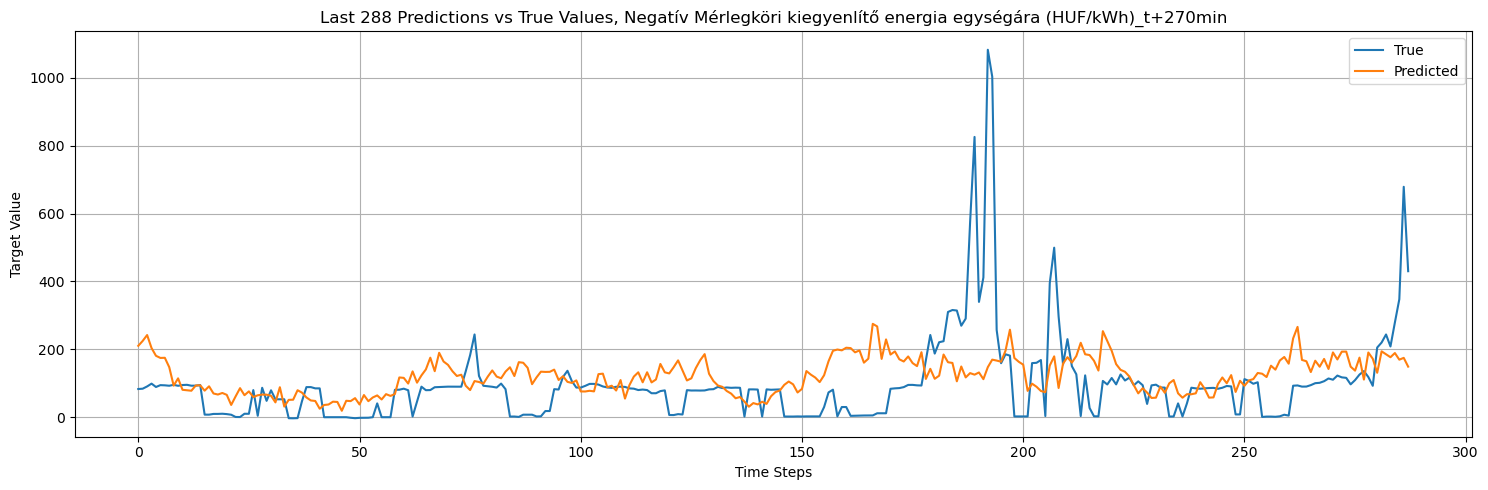

rmse: 123.06000779969351
mae: 89.55645209680658
r2: -0.630834698677063


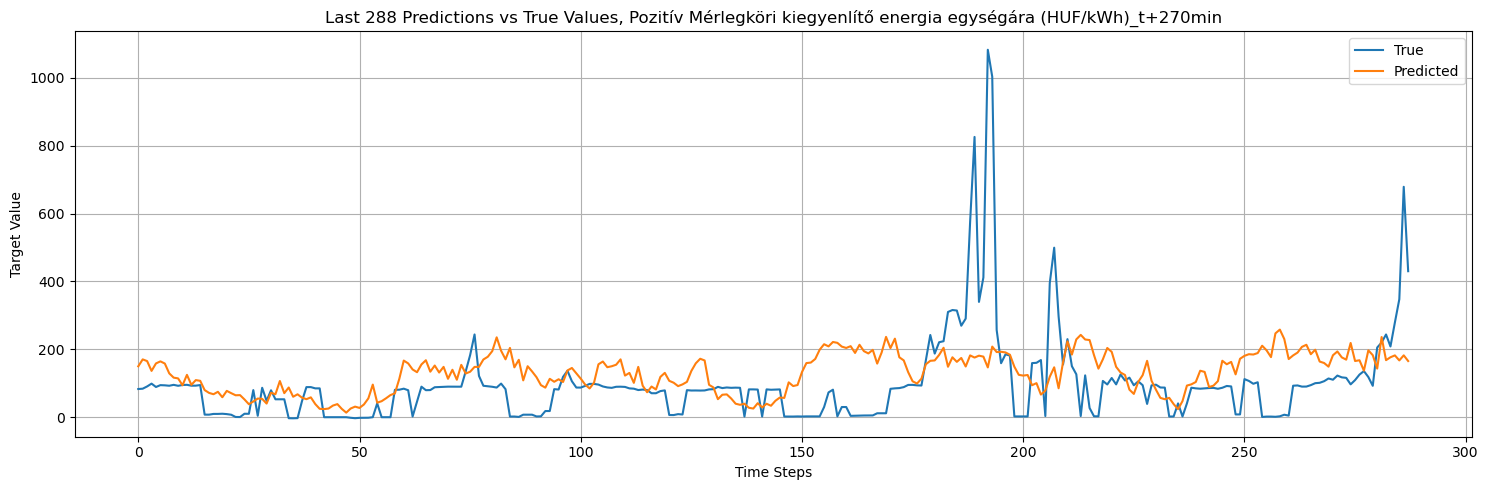

rmse: 122.22041790455329
mae: 88.5242719217638
r2: -0.6086575984954834


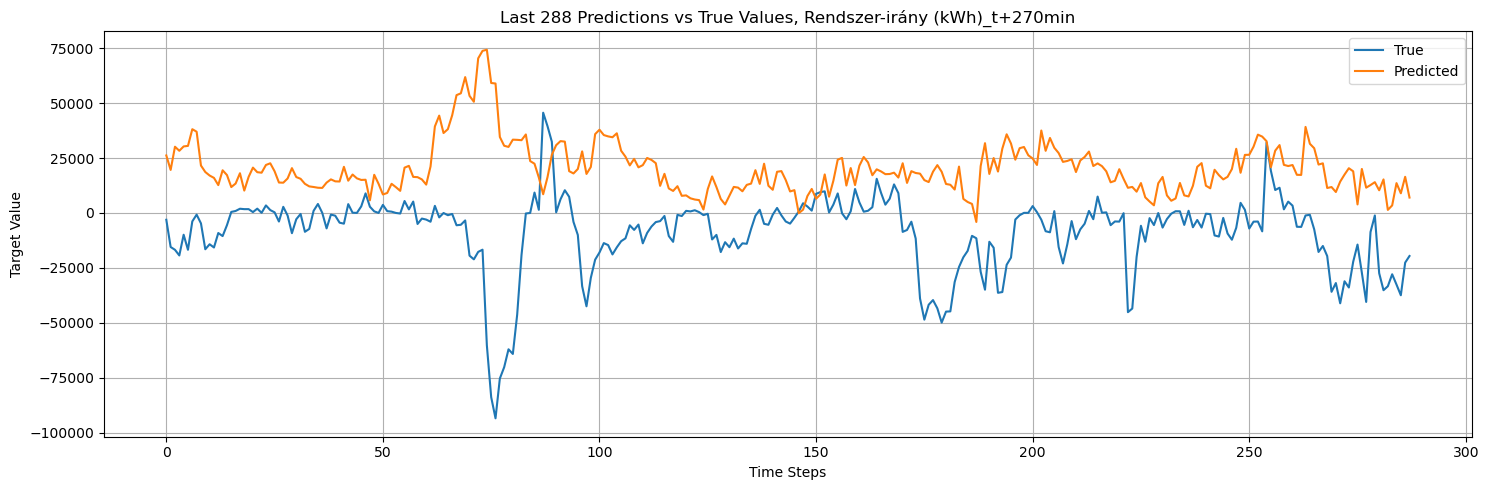

rmse: 28804.749317169862
mae: 18722.30706423548
r2: -0.10724771022796631


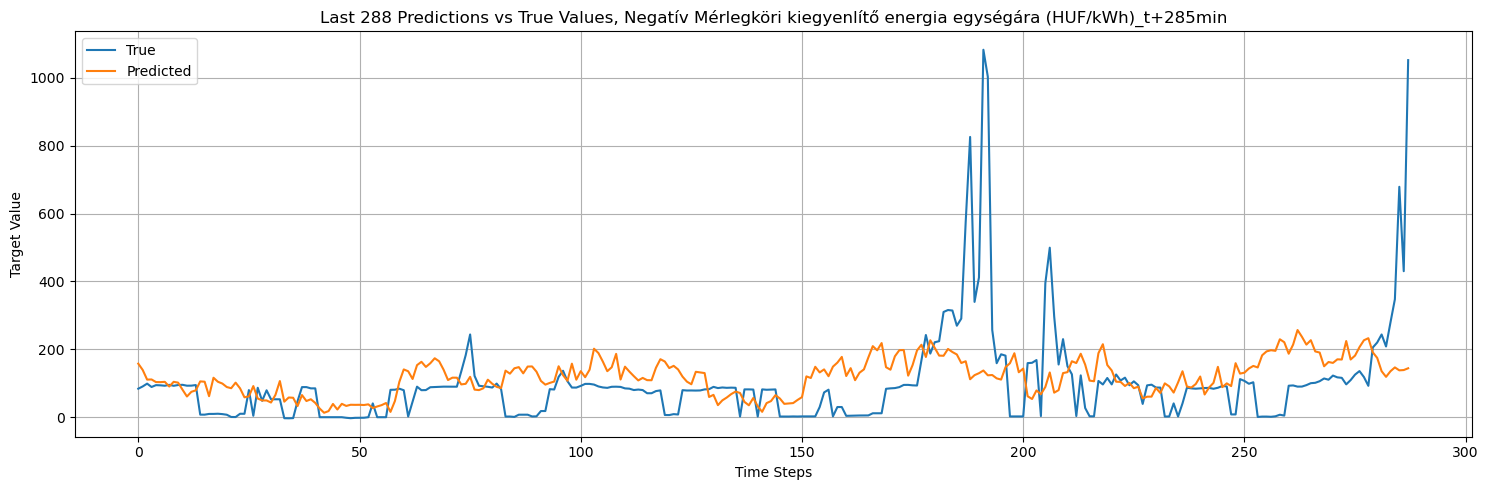

rmse: 125.75335516748723
mae: 91.92885954442131
r2: -0.6985766887664795


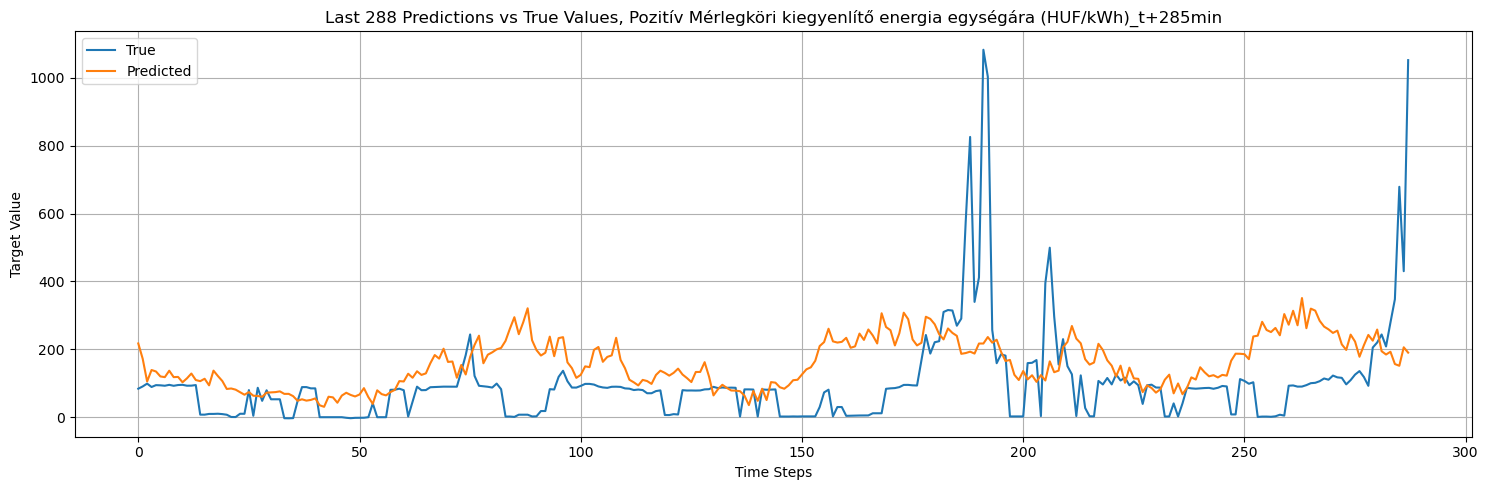

rmse: 125.64403031602257
mae: 91.4204371270147
r2: -0.6956244707107544


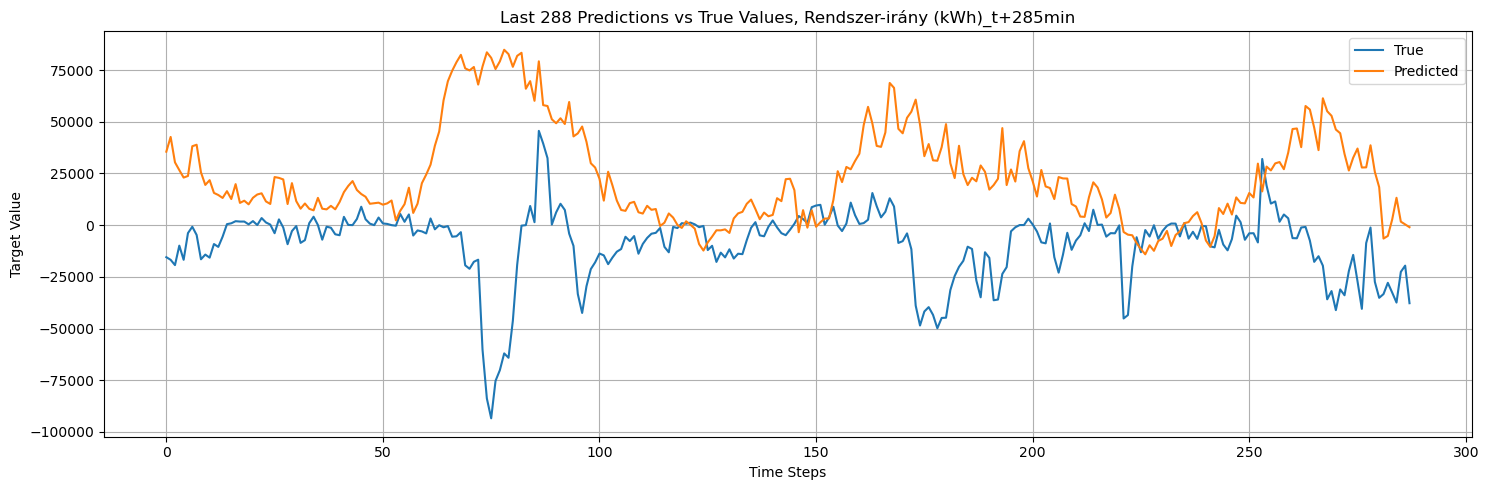

rmse: 28525.43058624973
mae: 18413.75092590219
r2: -0.08582007884979248


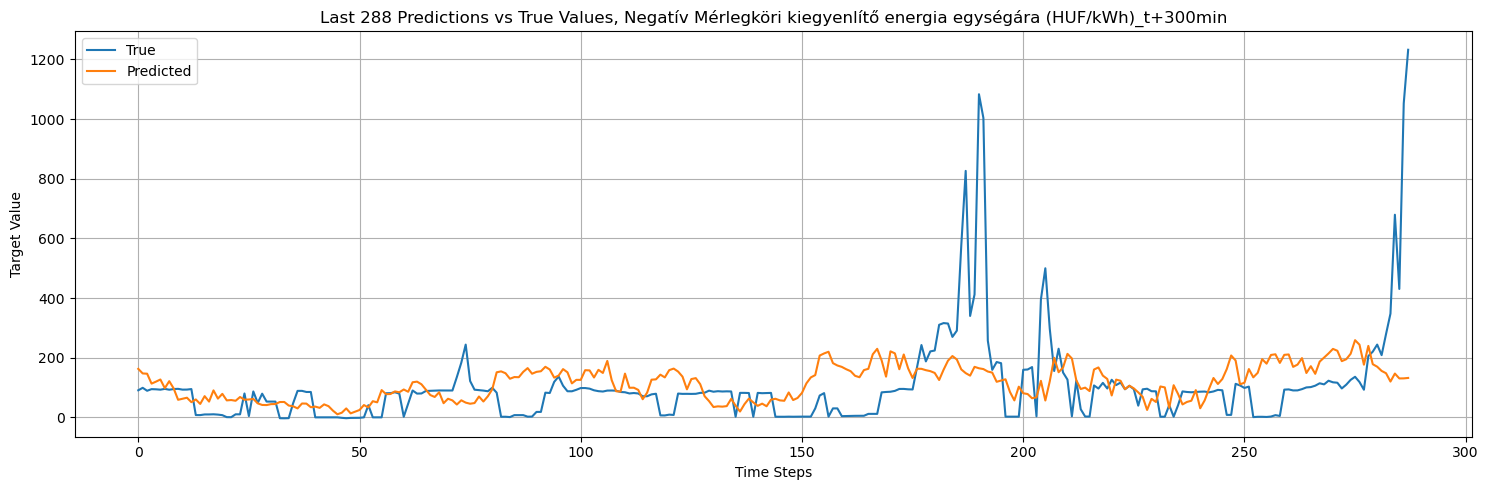

rmse: 121.22987582540087
mae: 86.32333576868898
r2: -0.5728973150253296


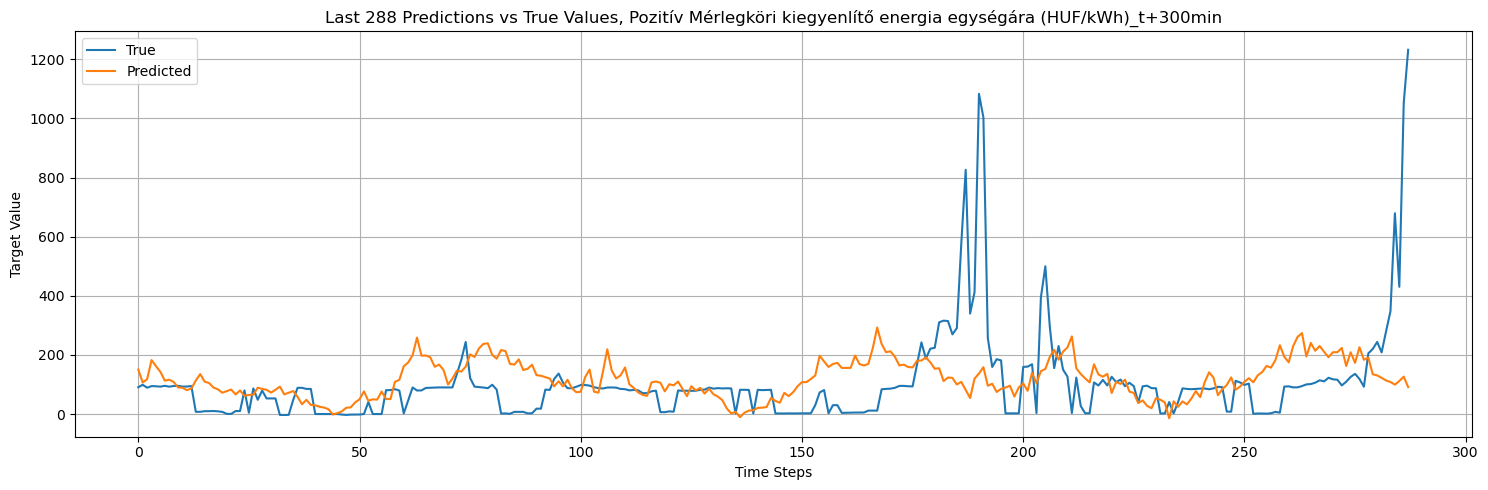

rmse: 120.9358821314458
mae: 86.79488773980293
r2: -0.5652776956558228


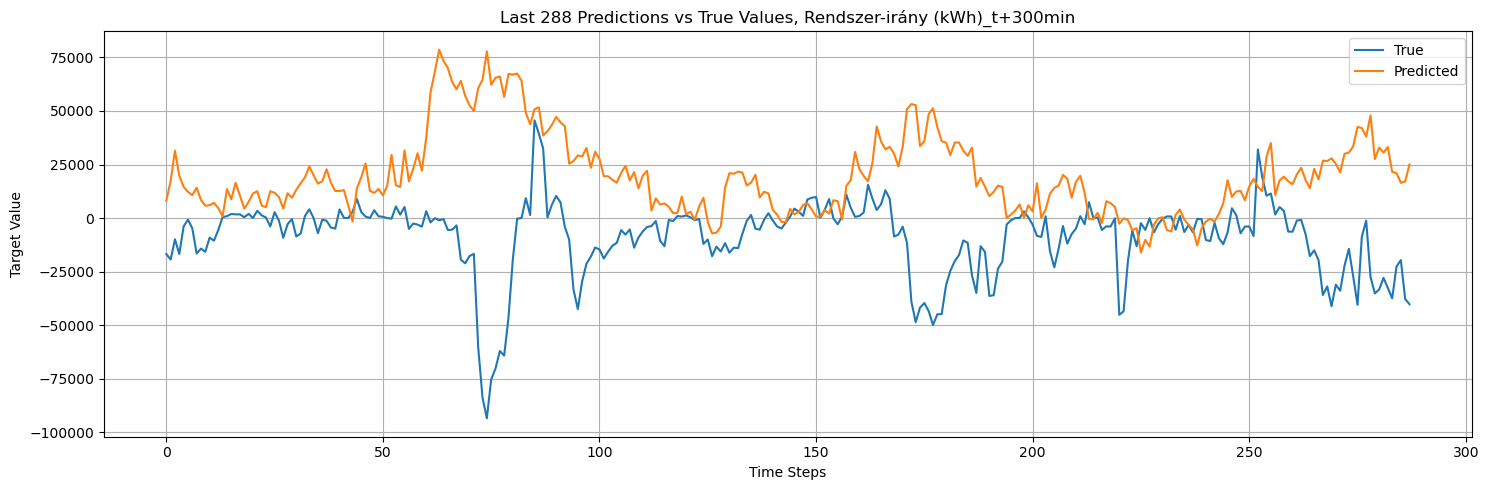

rmse: 29261.36367158573
mae: 19012.595781796237
r2: -0.14249300956726074


Target          RMSE  \
0   Negatív Mérlegköri kiegyenlítő energia egységá...    121.865514   
1   Pozitív Mérlegköri kiegyenlítő energia egységá...    124.566815   
2                       Rendszer-irány (kWh)_t+240min  28349.627071   
3   Negatív Mérlegköri kiegyenlítő energia egységá...    126.637562   
4   Pozitív Mérlegköri kiegyenlítő energia egységá...    125.275480   
5                       Rendszer-irány (kWh)_t+255min  28366.774740   
6   Negatív Mérlegköri kiegyenlítő energia egységá...    123.060008   
7   Pozitív Mérlegköri kiegyenlítő energia egységá...    122.220418   
8                       Rendszer-irány (kWh)_t+270min  28804.749317   
9   Negatív Mérlegköri kiegyenlítő energia egységá...    125.753355   
10  Pozitív Mérlegköri kiegyenlítő energia egységá...    125.644030   
11                      Rendszer-irány (kWh)_t+285min  28525.430586   
12  Negatív Mérlegköri kiegyenlítő energia egységá...    121.229876   
13  Pozitív Mérlegköri kiegyenlítő energia egységá...    120.935882   
14                      Rendszer-irány (kWh)_t+300min  29261.363672   

             MAE        R²  
0      88.470975 -0.601551  
1      91.197515 -0.673339  
2   18222.743533 -0.072361  
3      93.133726 -0.727670  
4      91.643582 -0.690705  
5   18075.575429 -0.073781  
6      89.556452 -0.630835  
7      88.524272 -0.608658  
8   18722.307064 -0.107248  
9      91.928860 -0.698577  
10     91.420437 -0.695624  
11  18413.750926 -0.085820  
12     86.323336 -0.572897  
13     86.794888 -0.565278  
14  19012.595782 -0.142493

In [ ]:
results = []
# Iterate over target columns
for idx, col in enumerate(y_test.columns):
    rmse = root_mean_squared_error(y_test[col], y_pred[:, idx])
    mae = mean_absolute_error(y_test[col], y_pred[:, idx])
    r2 = r2_score(y_test[col], y_pred[:, idx])

    plt.figure(figsize=(15, 5))
    plt.plot(y_test[col][-288:], label="True")
    plt.plot(y_pred[-288:, idx], label="Predicted")
    plt.title(f"Last 288 Predictions vs True Values, {col}")
    plt.xlabel("Time Steps")
    plt.ylabel("Target Value")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    print("rmse:", rmse)
    print("mae:", mae)
    print("r2:", r2)

    results.append({"Target": col, "RMSE": rmse, "MAE": mae, "R²": r2})

results_df = pd.DataFrame(results)
display(results_df)

In [ ]:
import polars as pl
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor
from sklearn.metrics import root_mean_squared_error

# Convert to pandas and set index
df = final_df.to_pandas()
df = df.set_index("Időpont")
df["hour"] = df.index.hour
df["dayofweek"] = df.index.dayofweek
df["month"] = df.index.month
df["is_weekend"] = (df.index.dayofweek >= 5).astype(int)

from preprocess_dataset_for_training import create_training_data

joined_df = pl.read_parquet("data/joined_df.parquet")
X, y = create_training_data(joined_df)


# Base predictors (originals)
base_predictors = [
    "Naperőművek becsült termelése (aktuális)",
    "Naperőművek becsült termelése (intraday)",
    "Naperőművek becsült termelése (dayahead)",
    "HU-UK",
    "HU-SK",
    "HU-RS",
    "HU-AT",
    "HU-HR",
    "HU-RO",
    "HU-AT menetrend",
    "HU-HR menetrend",
    "HU-SK menetrend",
    "HU-RS menetrend",
    "HU-UK menetrend",
    "HU-RO menetrend",
    "Bruttó terv erőművi termelés",
    "Bruttó tény erőművi termelés",
    "Bruttó hitelesített rendszerterhelés tény",
    "Bruttó rendszerterhelés becslés (dayahead)",
    "Szélerőművek becsült termelése (aktuális)",
    "Szélerőművek becsült termelése (dayahead)",
    "Szélerőművek becsült termelése (intraday)",
]

# Forecast horizons (in minutes)
forecast_steps = [15, 30, 45, 60, 75]

# Define target variable bases
target_bases = [
    "Negatív Mérlegköri kiegyenlítő energia egységára (HUF/kWh)",
    "Pozitív Mérlegköri kiegyenlítő energia egységára (HUF/kWh)",
    "Rendszer-irány (kWh)",
]

# 1. Build full predictor list (originals + all forward lags)
all_predictors = []
for base in base_predictors:
    # Include the original base predictor if present
    if base in df.columns:
        all_predictors.append(base)

    # Include all forward-lagged versions of this predictor
    forward_lagged = [col for col in df.columns if col.startswith(base + "_t+")]
    all_predictors.extend(forward_lagged)

print(all_predictors)

['Naperőművek becsült termelése (aktuális)', 'Naperőművek becsült termelése (aktuális)_t+15min', 'Naperőművek becsült termelése (aktuális)_t+30min', 'Naperőművek becsült termelése (aktuális)_t+45min', 'Naperőművek becsült termelése (aktuális)_t+60min', 'Naperőművek becsült termelése (aktuális)_t+75min', 'Naperőművek becsült termelése (aktuális)_t+90min', 'Naperőművek becsült termelése (aktuális)_t+105min', 'Naperőművek becsült termelése (aktuális)_t+120min', 'Naperőművek becsült termelése (aktuális)_t+135min', 'Naperőművek becsült termelése (aktuális)_t+150min', 'Naperőművek becsült termelése (aktuális)_t+165min', 'Naperőművek becsült termelése (aktuális)_t+180min', 'Naperőművek becsült termelése (aktuális)_t+195min', 'Naperőművek becsült termelése (aktuális)_t+210min', 'Naperőművek becsült termelése (aktuális)_t+225min', 'Naperőművek becsült termelése (aktuális)_t+240min', 'Naperőművek becsült termelése (aktuális)_t+255min', 'Naperőművek becsült termelése (aktuális)_t+270min', 'Naperő

In [9]:
# 2. Build full target list (only forward lags)
target_columns = []
for target_base in target_bases:
    for step in forecast_steps:
        target_col = f"{target_base}_t+{step}min"
        if target_col in df.columns:
            target_columns.append(target_col)
print(target_columns)

['Negatív Mérlegköri kiegyenlítő energia egységára (HUF/kWh)_t+240min', 'Negatív Mérlegköri kiegyenlítő energia egységára (HUF/kWh)_t+255min', 'Negatív Mérlegköri kiegyenlítő energia egységára (HUF/kWh)_t+270min', 'Negatív Mérlegköri kiegyenlítő energia egységára (HUF/kWh)_t+285min', 'Negatív Mérlegköri kiegyenlítő energia egységára (HUF/kWh)_t+300min', 'Pozitív Mérlegköri kiegyenlítő energia egységára (HUF/kWh)_t+240min', 'Pozitív Mérlegköri kiegyenlítő energia egységára (HUF/kWh)_t+255min', 'Pozitív Mérlegköri kiegyenlítő energia egységára (HUF/kWh)_t+270min', 'Pozitív Mérlegköri kiegyenlítő energia egységára (HUF/kWh)_t+285min', 'Pozitív Mérlegköri kiegyenlítő energia egységára (HUF/kWh)_t+300min', 'Rendszer-irány (kWh)_t+240min', 'Rendszer-irány (kWh)_t+255min', 'Rendszer-irány (kWh)_t+270min', 'Rendszer-irány (kWh)_t+285min', 'Rendszer-irány (kWh)_t+300min']


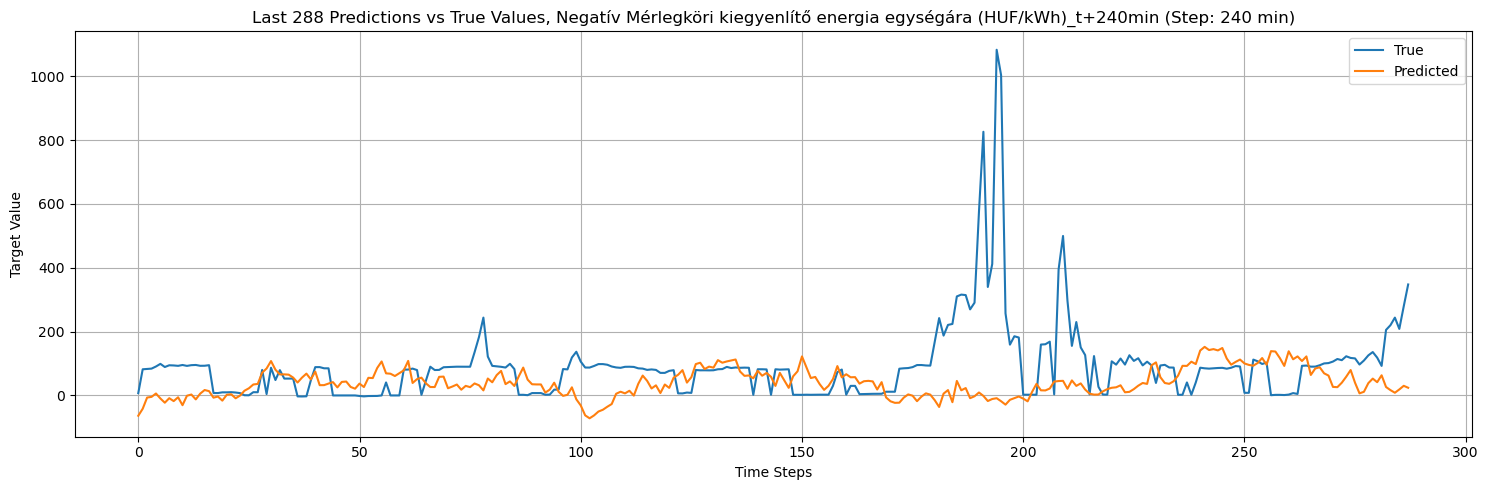

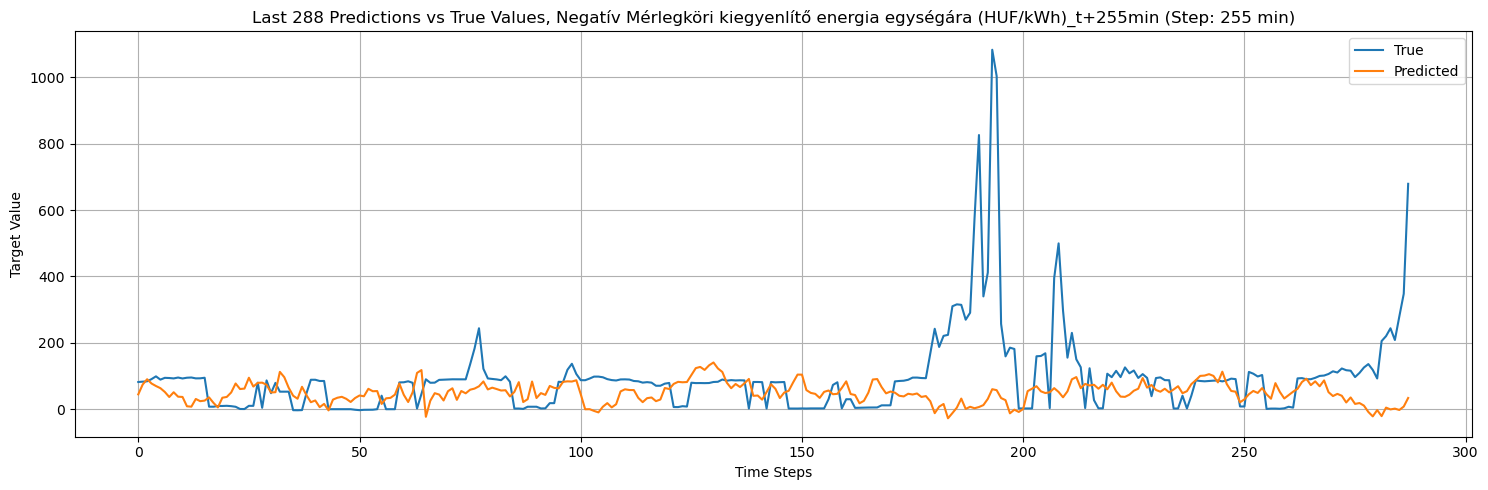

Exception ignored on calling ctypes callback function: <bound method DataIter._next_wrapper of <xgboost.data.SingleBatchInternalIter object at 0x00000229B82D5CD0>>
Traceback (most recent call last):
  File "c:\Users\marti\anaconda3\Lib\site-packages\xgboost\core.py", line 585, in _next_wrapper
    def _next_wrapper(self, this: None) -> int:  # pylint: disable=unused-argument

KeyboardInterrupt: 


: 

: 

In [ ]:
# 3. Train models
results = []
import matplotlib.pyplot as plt

for target_col in target_columns:
    # Drop NaNs
    data = df[all_predictors + [target_col]].dropna()
    if data.shape[0] < 100:
        continue

    X = data[all_predictors]
    y = data[target_col]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

    # Scale
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Fit XGBoost
    model = XGBRegressor(n_estimators=200, learning_rate=0.1, random_state=42)
    model.fit(X_train_scaled, y_train)

    # Predict
    y_pred = model.predict(X_test_scaled)

    # Evaluate
    rmse = root_mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Extract step in minutes
    step = int(target_col.split("_t+")[1].replace("min", ""))
    # Plot last 288 points
    plt.figure(figsize=(15, 5))
    plt.plot(y_test[-288:].values, label="True")
    plt.plot(y_pred[-288:], label="Predicted")
    plt.title(f"Last 288 Predictions vs True Values, {target_col} (Step: {step} min)")
    plt.xlabel("Time Steps")
    plt.ylabel("Target Value")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    results.append({"Target": target_col.split("_t+")[0], "Step (min)": step, "RMSE": rmse, "MAE": mae, "R²": r2})

# Display
results_df = pd.DataFrame(results)
display(results_df.sort_values(["Target", "Step (min)"]))

c:\Users\marti\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1315/1315 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


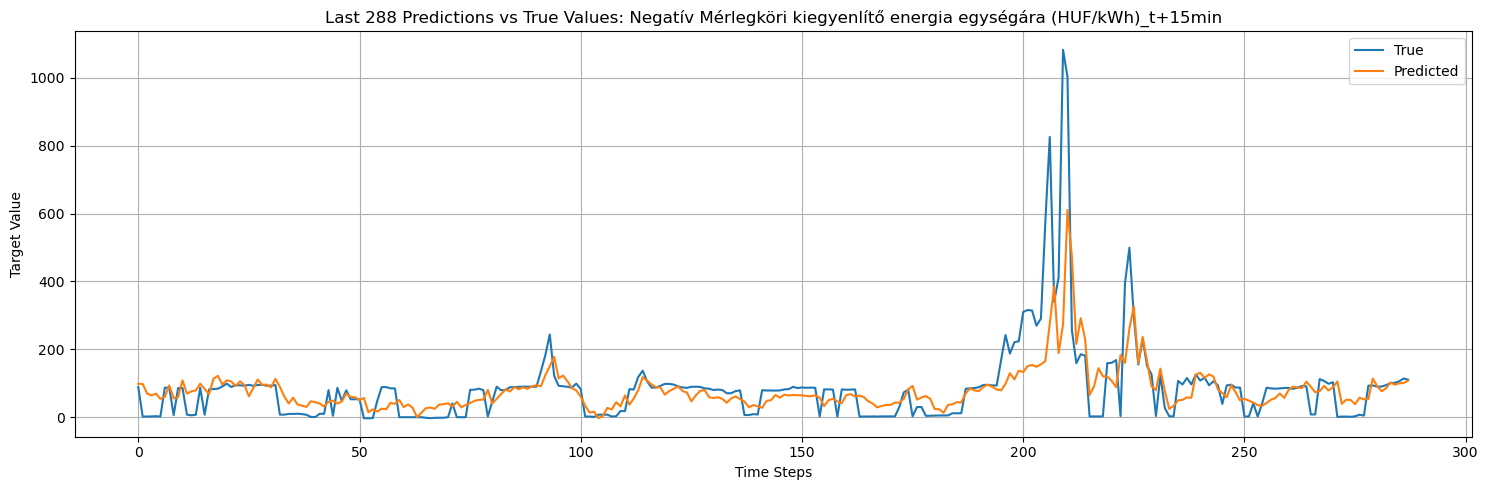

c:\Users\marti\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


KeyboardInterrupt: 

In [ ]:
from preprocess_dataset_for_training import create_training_data
import polars as pl
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Load data and create training sets
joined_df = pl.read_parquet("data/joined_df.parquet")
X, y = create_training_data(joined_df)  # X: all predictors, y: all targets

results = []
# Iterate over each target column in y
for col in y.columns:
    # Split data for current target
    X_train, X_test, y_train, y_test = train_test_split(X, y[col], test_size=0.2, shuffle=False)

    # Scale predictors
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Define the neural network model
    model = Sequential(
        [
            Dense(256, activation="relu", input_shape=(X_train_scaled.shape[1],)),
            Dropout(0.3),
            Dense(128, activation="relu"),
            Dropout(0.2),
            Dense(1),
        ]
    )
    model.compile(optimizer="adam", loss="mse", metrics=[tf.keras.metrics.RootMeanSquaredError()])

    # Train the model
    model.fit(X_train_scaled, y_train, epochs=20, batch_size=32, verbose=0)

    # Predict and evaluate
    y_pred = model.predict(X_test_scaled).flatten()
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Plot last 288 observations for visual evaluation
    plt.figure(figsize=(15, 5))
    plt.plot(y_test[-288:], label="True")
    plt.plot(y_pred[-288:], label="Predicted")
    plt.title(f"Last 288 Predictions vs True Values: {col}")
    plt.xlabel("Time Steps")
    plt.ylabel("Target Value")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    results.append({"Target": col, "RMSE": rmse, "MAE": mae, "R²": r2})

# Display results
results_df = pd.DataFrame(results)
display(results_df.sort_values("Target"))

In [ ]:
print("rmse:", rmse)
print("mae:", mae)
print("r2:", r2)

rmse: 71.53081863411428
mae: 39.076947907414926
r2: 0.44905978441238403


In [ ]:
from preprocess_dataset_for_training import create_training_data
import polars as pl
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Load data and create training sets (X: all predictors, y: all targets)
joined_df = pl.read_parquet("data/joined_df.parquet")
X, y = create_training_data(joined_df)  # y: multi-target

# Split data once
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Scale predictors
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the multi-output neural network model
model = Sequential(
    [
        Dense(256, activation="relu", input_shape=(X_train_scaled.shape[1],)),
        Dropout(0.3),
        Dense(128, activation="relu"),
        Dropout(0.2),
        Dense(y_train.shape[1]),  # number of outputs equals number of target columns
    ]
)
model.compile(optimizer="adam", loss="mse", metrics=[tf.keras.metrics.RootMeanSquaredError()])

# Train the model with visible epochs output (verbose=1)
model.fit(X_train_scaled, y_train, epochs=20, batch_size=32, verbose=1, validation_split=0.1)

# Predict multi-target outputs
y_pred = model.predict(X_test_scaled)

# Evaluate and plot per target column
results = []
for idx, col in enumerate(y.columns):
    rmse = np.sqrt(mean_squared_error(y_test[col], y_pred[:, idx]))
    mae = mean_absolute_error(y_test[col], y_pred[:, idx])
    r2 = r2_score(y_test[col], y_pred[:, idx])

    plt.figure(figsize=(15, 5))
    plt.plot(y_test[col][-288:], label="True")
    plt.plot(y_pred[-288:, idx], label="Predicted")
    plt.title(f"Last 288 Predictions vs True Values: {col}")
    plt.xlabel("Time Steps")
    plt.ylabel("Target Value")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    print("rmse:", rmse)
    print("mae:", mae)
    print("r2:", r2)
    results.append({"Target": col, "RMSE": rmse, "MAE": mae, "R²": r2})

results_df = pd.DataFrame(results)
display(results_df.sort_values("Target"))

c:\Users\marti\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
4734/4734 ━━━━━━━━━━━━━━━━━━━━ 50s 10ms/step - loss: 158171680.0000 - root_mean_squared_error: 12506.9551 - val_loss: 143888496.0000 - val_root_mean_squared_error: 11995.3535
Epoch 2/20
4734/4734 ━━━━━━━━━━━━━━━━━━━━ 42s 9ms/step - loss: 99369936.0000 - root_mean_squared_error: 9967.9199 - val_loss: 139854176.0000 - val_root_mean_squared_error: 11825.9961
Epoch 3/20
4734/4734 ━━━━━━━━━━━━━━━━━━━━ 44s 9ms/step - loss: 93880800.0000 - root_mean_squared_error: 9689.0605 - val_loss: 131768384.0000 - val_root_mean_squared_error: 11479.0410
Epoch 4/20
4734/4734 ━━━━━━━━━━━━━━━━━━━━ 43s 9ms/step - loss: 91641432.0000 - root_mean_squared_error: 9572.7041 - val_loss: 132006576.0000 - val_root_mean_squared_error: 11489.4111
Epoch 5/20
4734/4734 ━━━━━━━━━━━━━━━━━━━━ 44s 9ms/step - loss: 89981120.0000 - root_mean_squared_error: 9485.7529 - val_loss: 129641152.0000 - val_root_mean_squared_error: 11386.0068
Epoch 6/20
4734/4734 ━━━━━━━━━━━━━━━━━━━━ 43s 9ms/step - loss: 88135848.0000 - roo

AttributeError: 'Series' object has no attribute 'values'

<Figure size 1500x500 with 0 Axes>

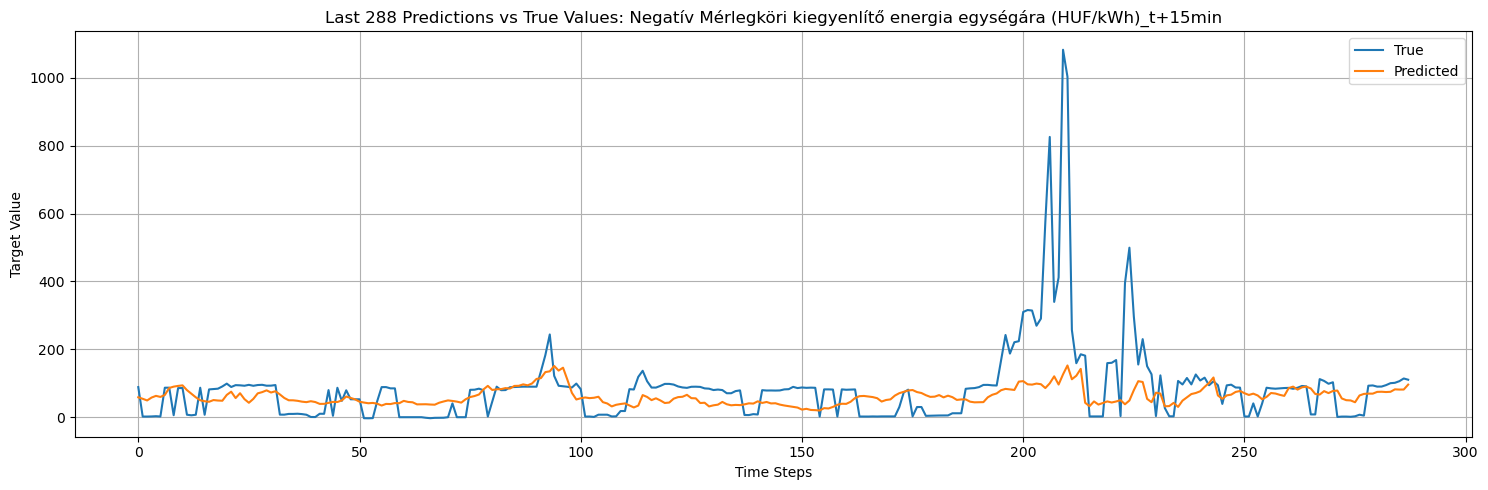

rmse: 86.33050090917277
mae: 51.61435719377267
r2: 0.19749706983566284


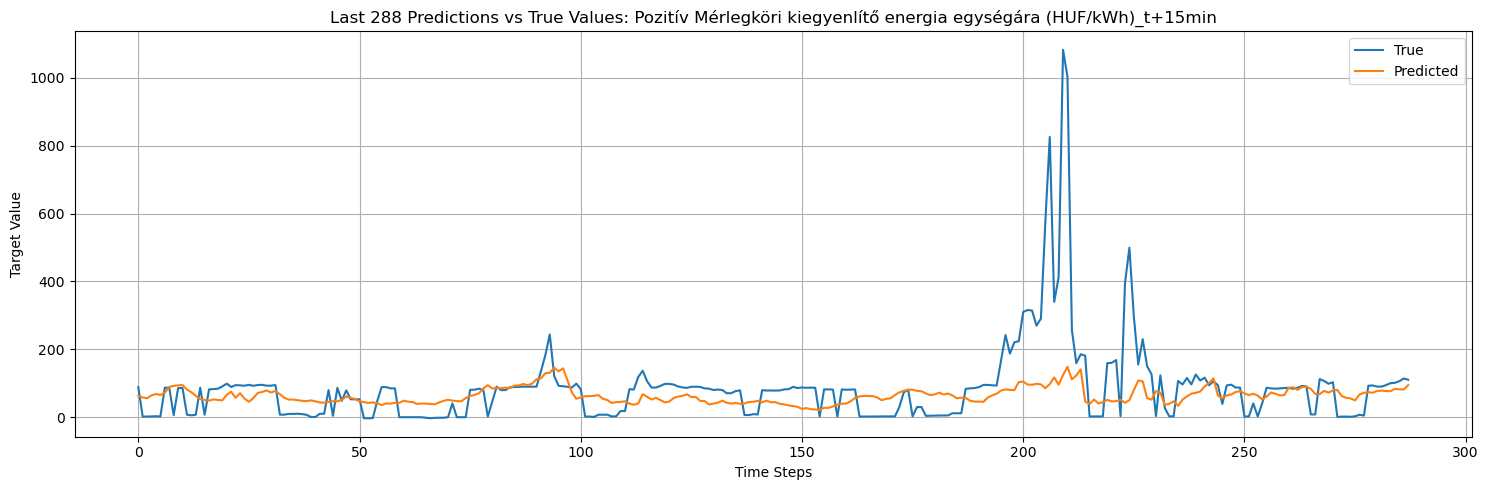

rmse: 87.78014423529488
mae: 54.81476580063922
r2: 0.17031997442245483


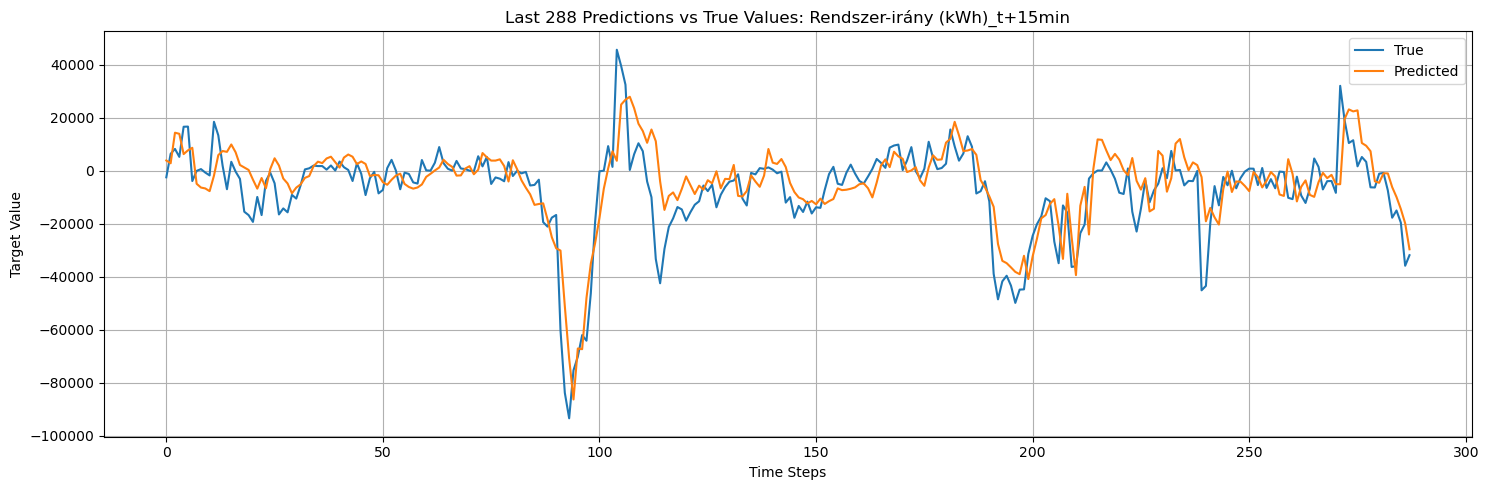

rmse: 16434.785870085765
mae: 11381.051701357092
r2: 0.6403497457504272


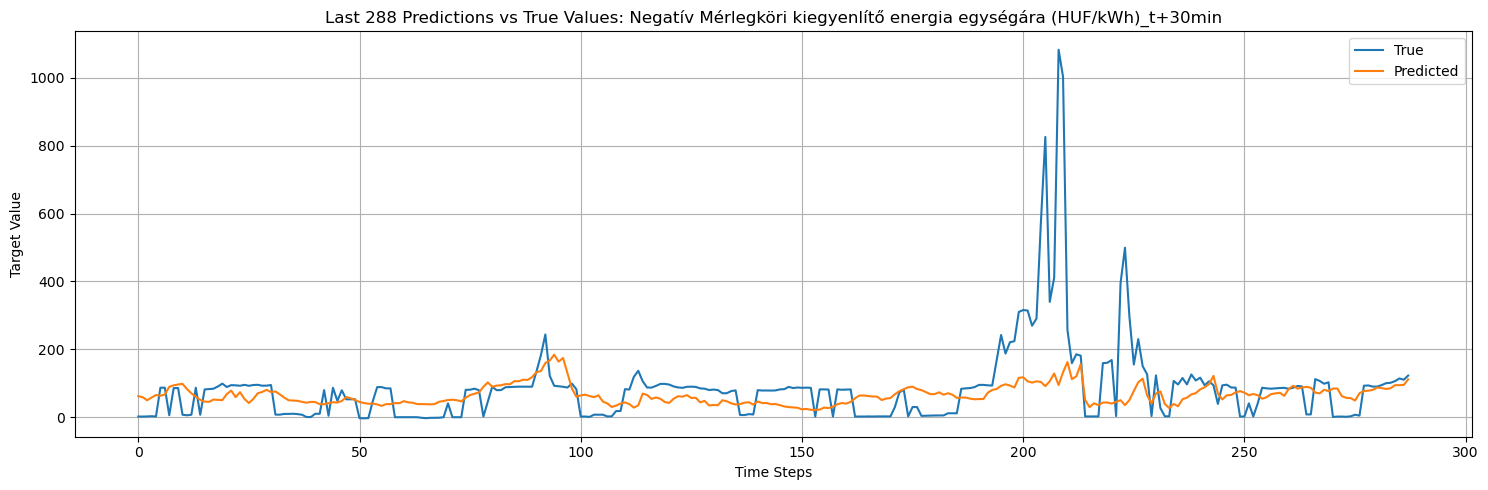

rmse: 89.51684047100255
mae: 53.72660412162816
r2: 0.13677847385406494


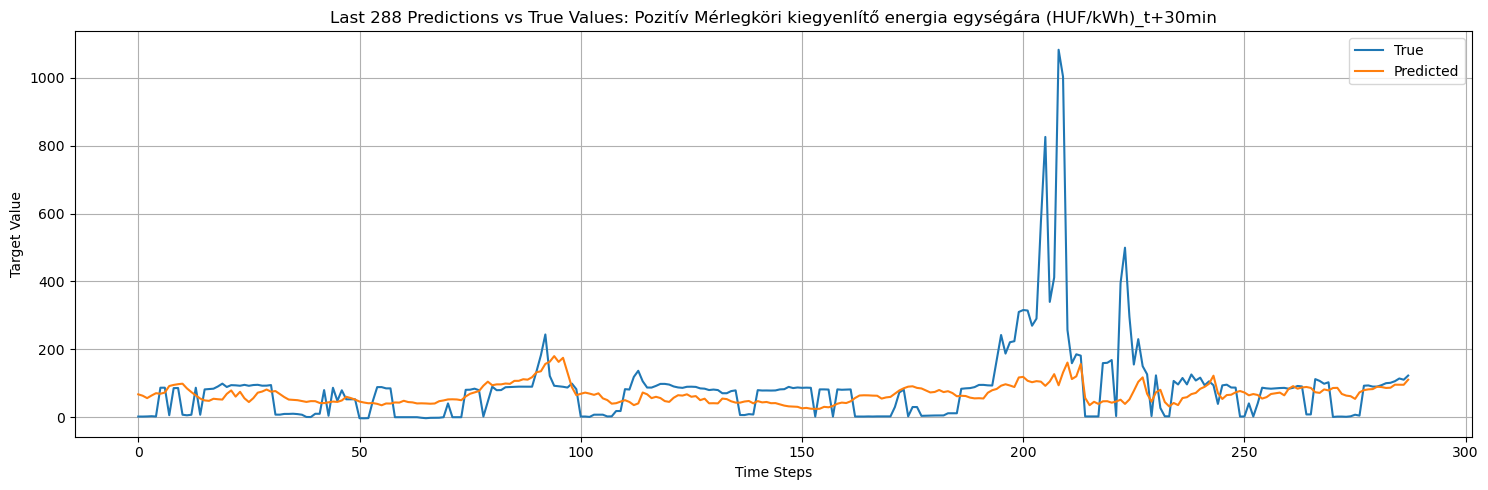

rmse: 90.53812298612475
mae: 56.44192506321737
r2: 0.11696940660476685


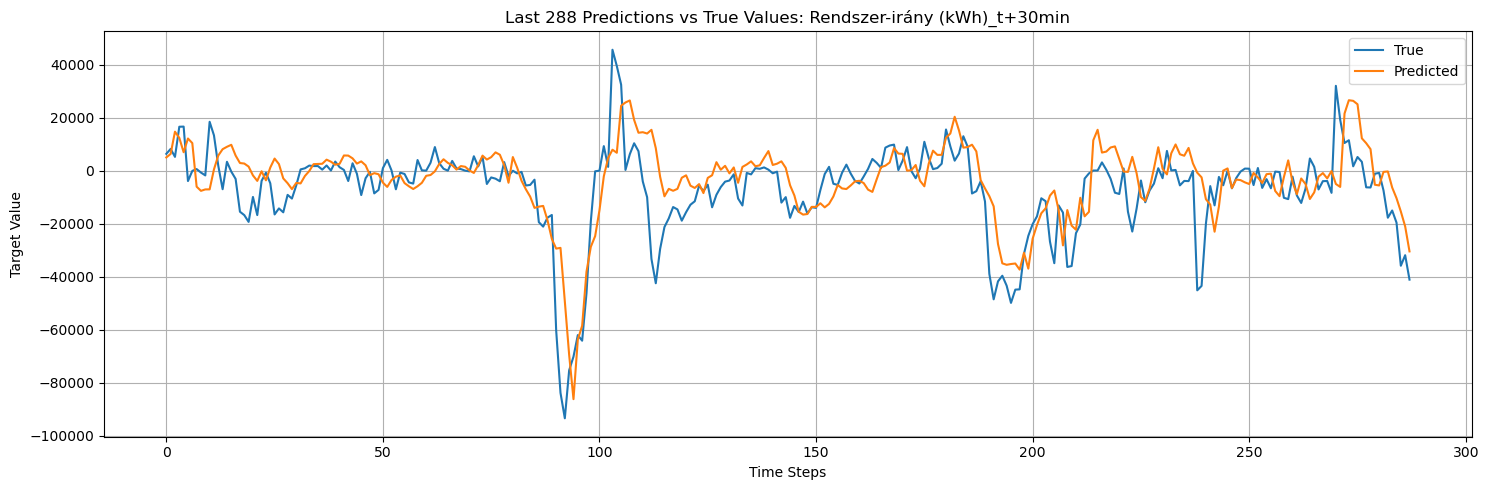

rmse: 19144.79763604904
mae: 12977.055044597852
r2: 0.5118727684020996


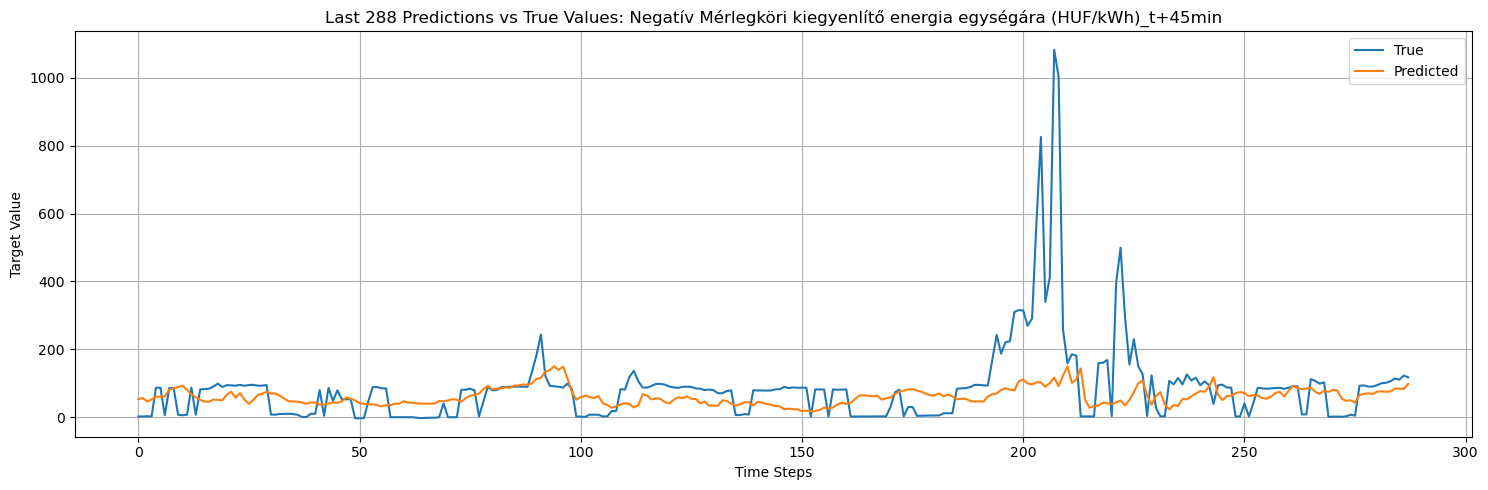

rmse: 91.58707043714482
mae: 53.63379504902954
r2: 0.09612512588500977


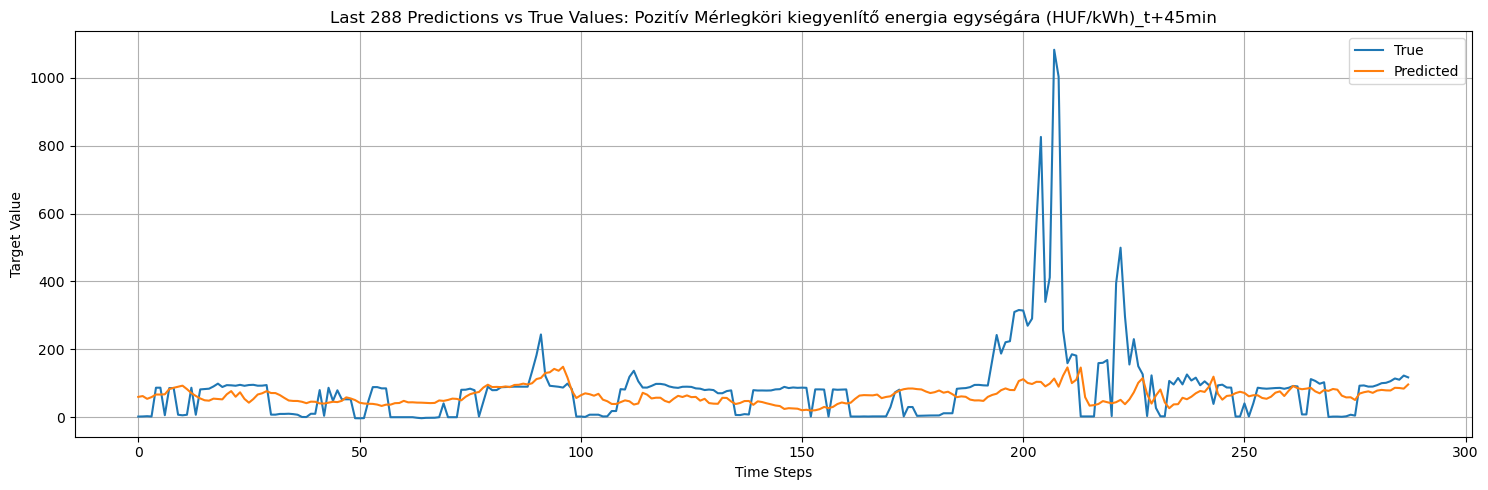

rmse: 92.49844836993955
mae: 56.54930960948483
r2: 0.07804685831069946


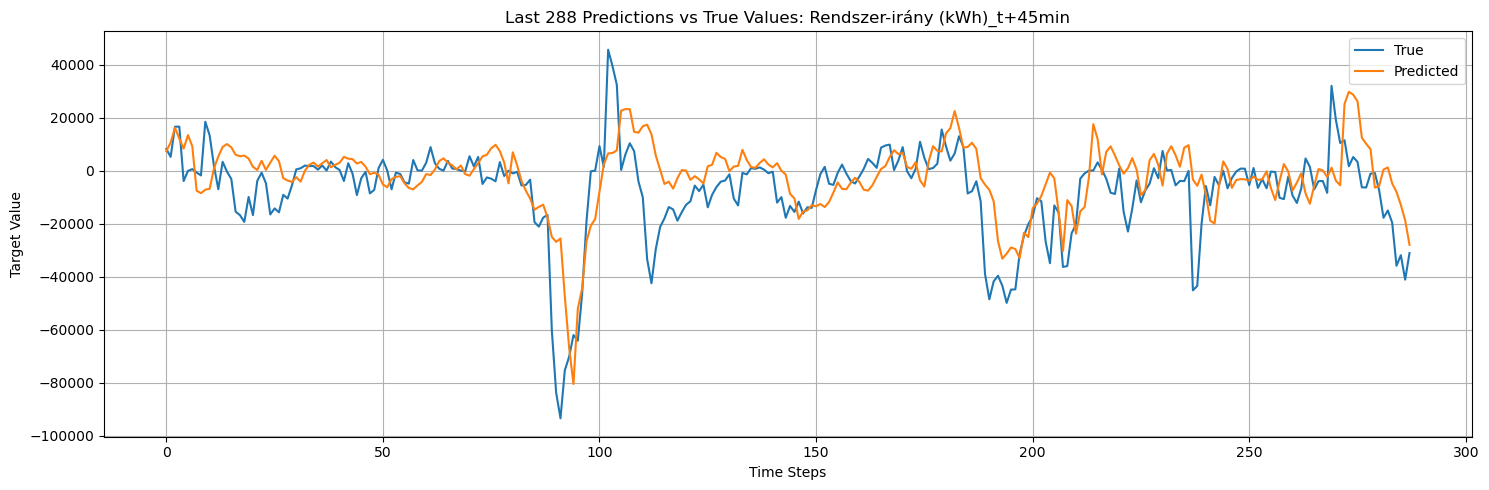

rmse: 21328.066078901848
mae: 14331.431791526169
r2: 0.39404135942459106


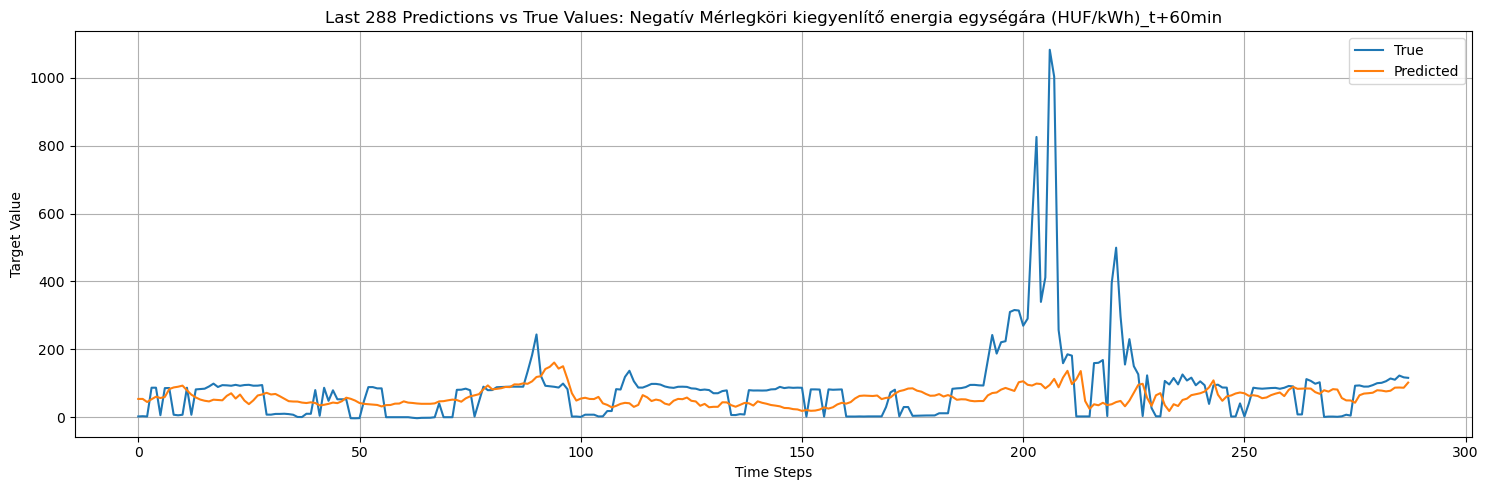

rmse: 93.11186550123226
mae: 54.976688423818224
r2: 0.06544661521911621


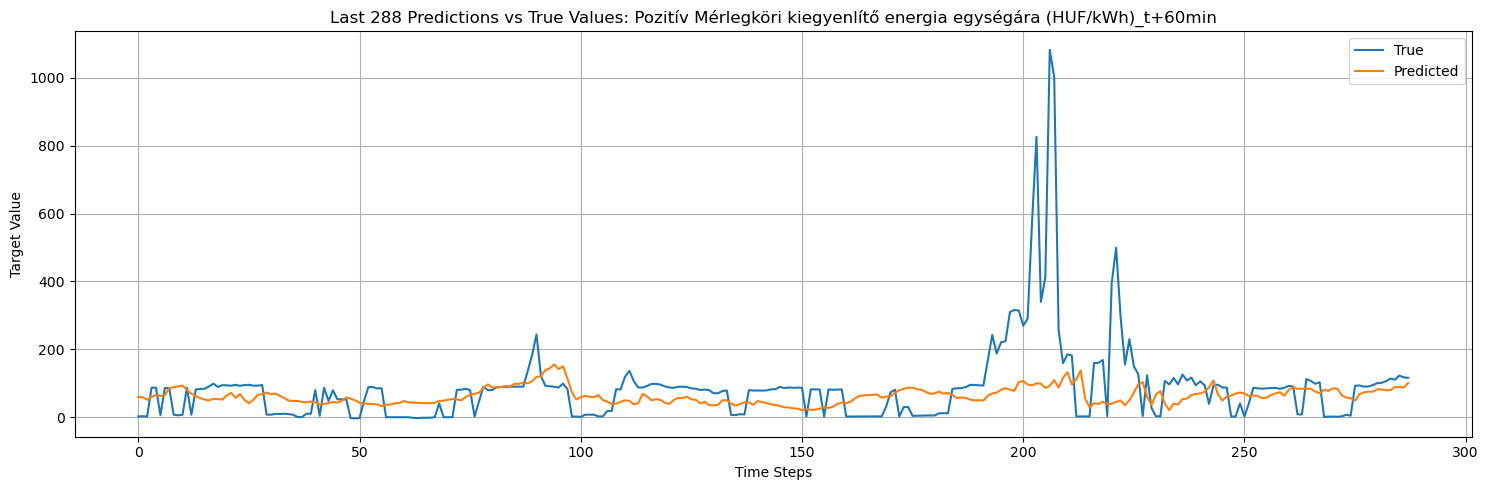

rmse: 93.65728818957876
mae: 57.22866991996405
r2: 0.05446583032608032


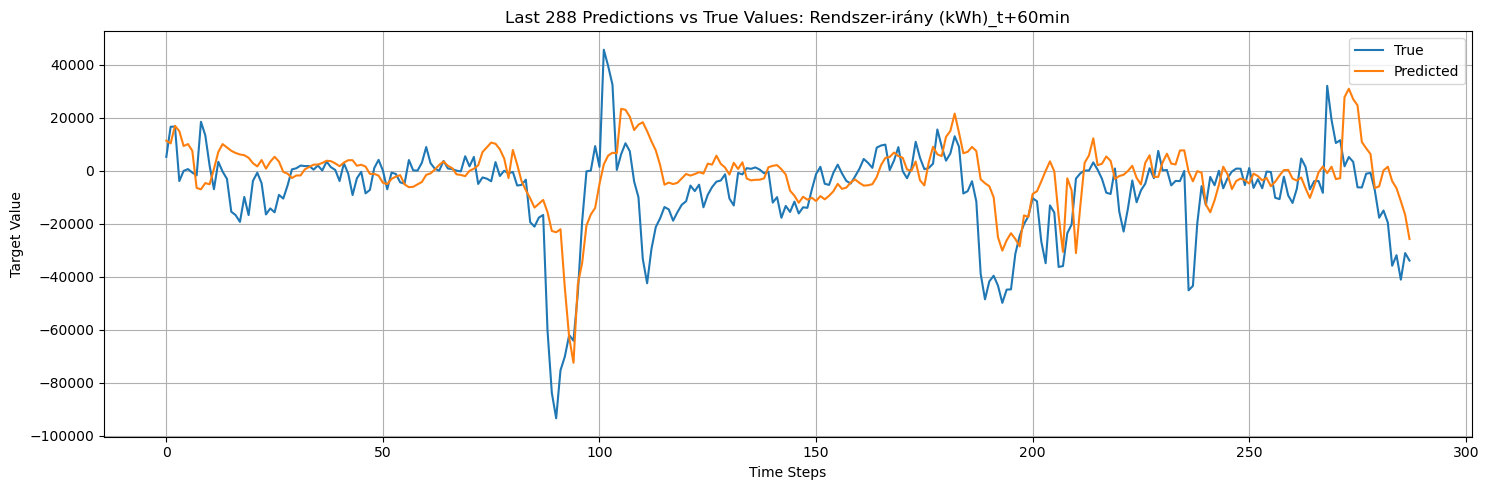

rmse: 22853.663701488415
mae: 15127.748336033193
r2: 0.30404919385910034


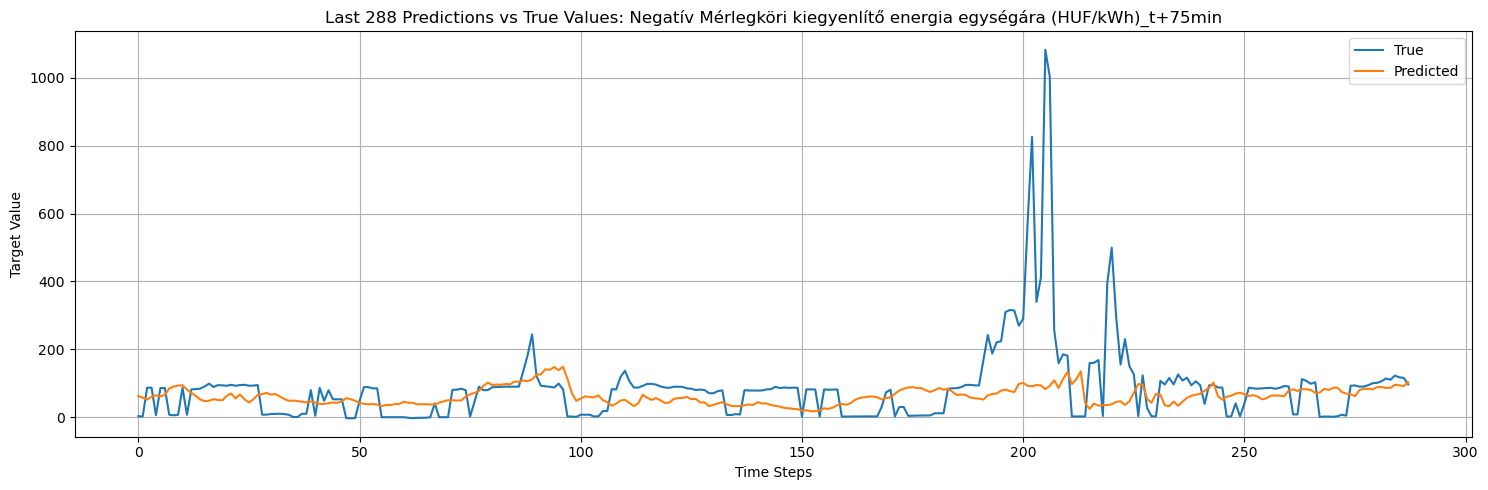

rmse: 96.45427793867042
mae: 60.44984287887282
r2: -0.003239154815673828


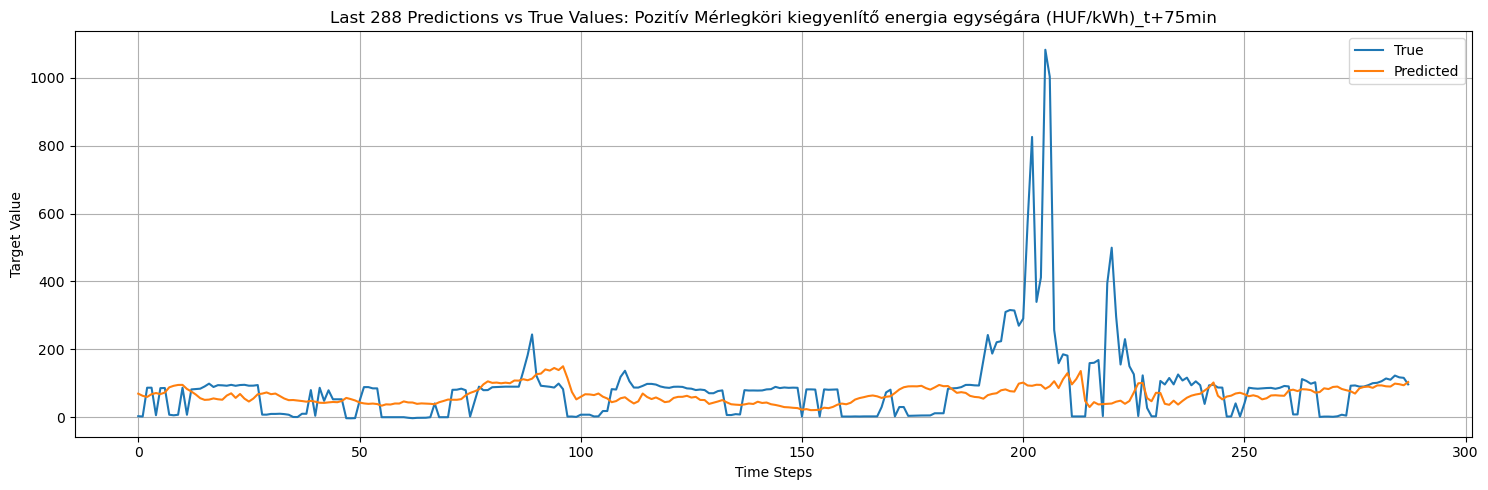

rmse: 97.65183450446334
mae: 63.369980669087546
r2: -0.028305768966674805


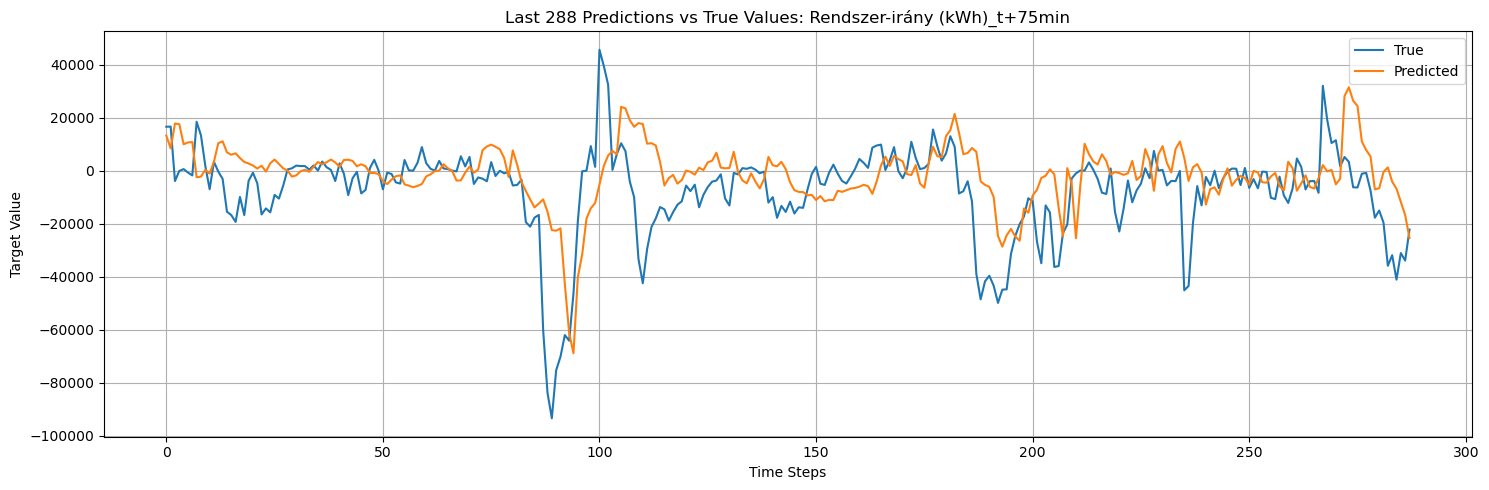

rmse: 24495.14726889767
mae: 15948.037229062256
r2: 0.2003820538520813


Target          RMSE  \
0   Negatív Mérlegköri kiegyenlítő energia egységá...     86.330501   
3   Negatív Mérlegköri kiegyenlítő energia egységá...     89.516840   
6   Negatív Mérlegköri kiegyenlítő energia egységá...     91.587070   
9   Negatív Mérlegköri kiegyenlítő energia egységá...     93.111866   
12  Negatív Mérlegköri kiegyenlítő energia egységá...     96.454278   
1   Pozitív Mérlegköri kiegyenlítő energia egységá...     87.780144   
4   Pozitív Mérlegköri kiegyenlítő energia egységá...     90.538123   
7   Pozitív Mérlegköri kiegyenlítő energia egységá...     92.498448   
10  Pozitív Mérlegköri kiegyenlítő energia egységá...     93.657288   
13  Pozitív Mérlegköri kiegyenlítő energia egységá...     97.651835   
2                        Rendszer-irány (kWh)_t+15min  16434.785870   
5                        Rendszer-irány (kWh)_t+30min  19144.797636   
8                        Rendszer-irány (kWh)_t+45min  21328.066079   
11                       Rendszer-irány (kWh)_t+60min  22853.663701   
14                       Rendszer-irány (kWh)_t+75min  24495.147269   

             MAE        R²  
0      51.614357  0.197497  
3      53.726604  0.136778  
6      53.633795  0.096125  
9      54.976688  0.065447  
12     60.449843 -0.003239  
1      54.814766  0.170320  
4      56.441925  0.116969  
7      56.549310  0.078047  
10     57.228670  0.054466  
13     63.369981 -0.028306  
2   11381.051701  0.640350  
5   12977.055045  0.511873  
8   14331.431792  0.394041  
11  15127.748336  0.304049  
14  15948.037229  0.200382

In [ ]:
# Evaluate and plot per target column
results = []
for idx, col in enumerate(y.columns):
    rmse = np.sqrt(mean_squared_error(y_test[col], y_pred[:, idx]))
    mae = mean_absolute_error(y_test[col], y_pred[:, idx])
    r2 = r2_score(y_test[col], y_pred[:, idx])

    plt.figure(figsize=(15, 5))
    plt.plot(y_test[col][-288:], label="True")
    plt.plot(y_pred[-288:, idx], label="Predicted")
    plt.title(f"Last 288 Predictions vs True Values: {col}")
    plt.xlabel("Time Steps")
    plt.ylabel("Target Value")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    print("rmse:", rmse)
    print("mae:", mae)
    print("r2:", r2)
    results.append({"Target": col, "RMSE": rmse, "MAE": mae, "R²": r2})

results_df = pd.DataFrame(results)
display(results_df.sort_values("Target"))

c:\Users\marti\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1315/1315 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step


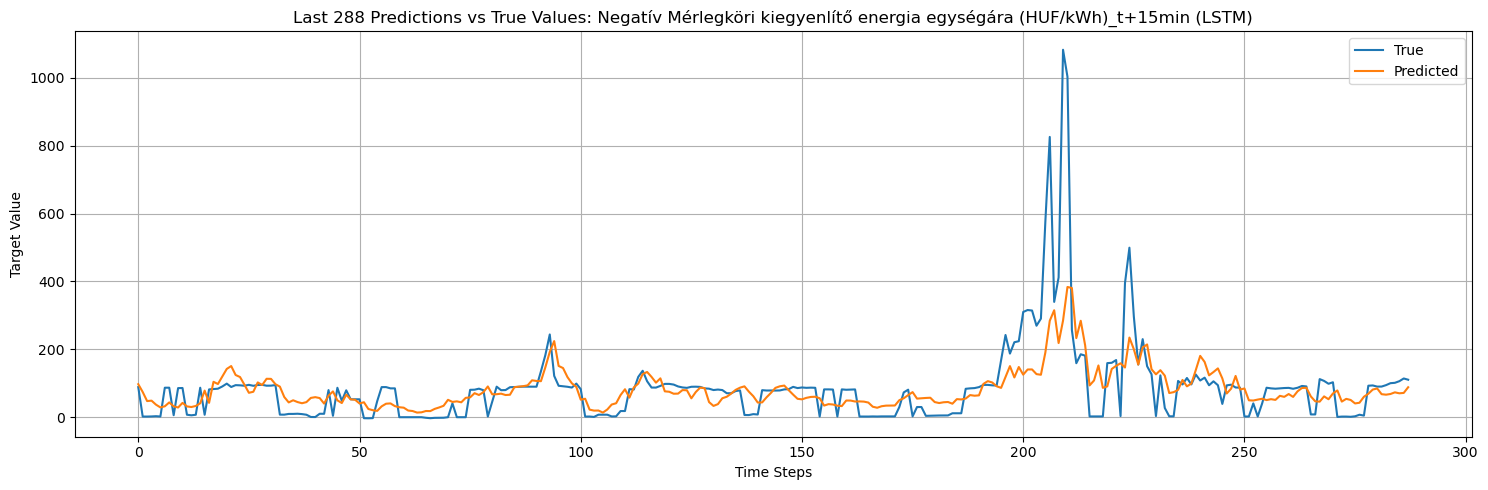

rmse: 73.50367079449241
mae: 39.5725005463076
r2: 0.41825032234191895


c:\Users\marti\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


KeyboardInterrupt: 

In [ ]:
from preprocess_dataset_for_training import create_training_data
import polars as pl
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Load data and create training sets (X: all predictors, y: all target columns)
joined_df = pl.read_parquet("data/joined_df.parquet")
X, y = create_training_data(joined_df)

results = []
# Iterate over each target column in y
for col in y.columns:
    # Split data for the current target
    X_train, X_test, y_train, y_test = train_test_split(X, y[col], test_size=0.2, shuffle=False)

    # Scale predictors
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Reshape predictors for LSTM: (samples, timesteps=1, features)
    X_train_reshaped = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
    X_test_reshaped = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

    # Define the LSTM model using Sequential
    model = Sequential(
        [LSTM(64, input_shape=(1, X_train_scaled.shape[1])), Dropout(0.3), Dense(32, activation="relu"), Dropout(0.2), Dense(1)]
    )
    model.compile(optimizer="adam", loss="mse", metrics=[tf.keras.metrics.RootMeanSquaredError()])

    # Train the model
    model.fit(X_train_reshaped, y_train, epochs=20, batch_size=128, verbose=0)

    # Predict and evaluate
    y_pred = model.predict(X_test_reshaped).flatten()
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Plot the last 288 observations
    plt.figure(figsize=(15, 5))
    plt.plot(y_test[-288:], label="True")
    plt.plot(y_pred[-288:], label="Predicted")
    plt.title(f"Last 288 Predictions vs True Values: {col} (LSTM)")
    plt.xlabel("Time Steps")
    plt.ylabel("Target Value")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    print("rmse:", rmse)
    print("mae:", mae)
    print("r2:", r2)
    results.append({"Target": col, "RMSE": rmse, "MAE": mae, "R²": r2})

results_df = pd.DataFrame(results)
display(results_df.sort_values("Target"))

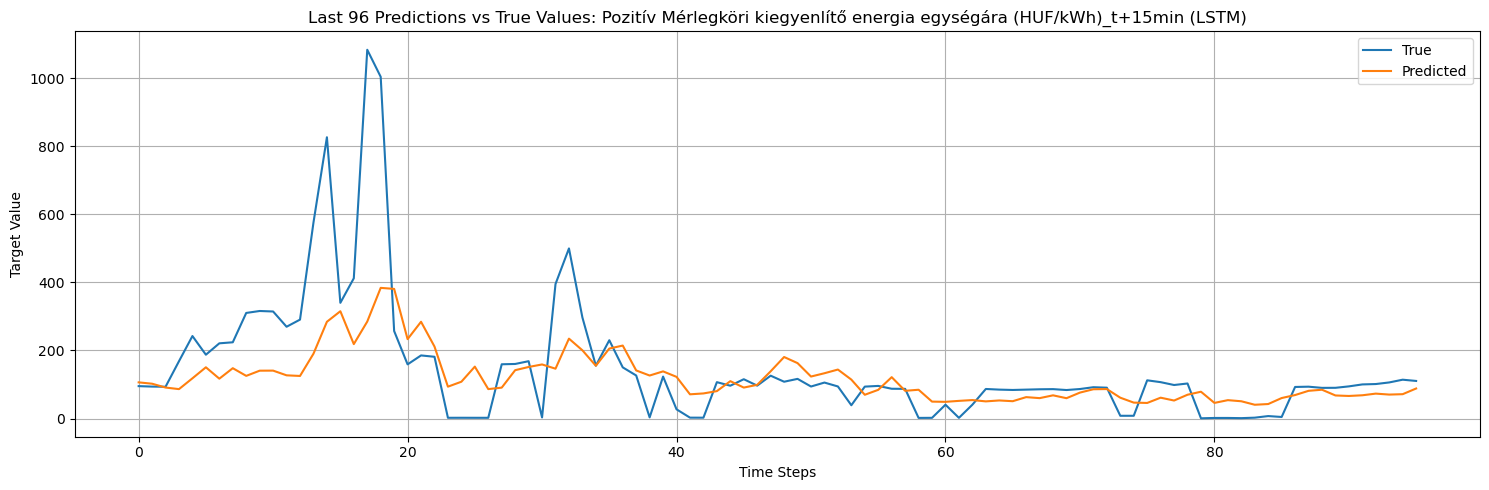

In [7]:
plt.figure(figsize=(15, 5))
plt.plot(y_test[-96:], label="True")
plt.plot(y_pred[-96:], label="Predicted")
plt.title(f"Last 96 Predictions vs True Values: {col} (LSTM)")
plt.xlabel("Time Steps")
plt.ylabel("Target Value")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import pandas as pd


# ------------------ Positional Encoding ------------------
class PositionalEncoding(layers.Layer):
    def __init__(self, d_model, max_len=5000):
        super().__init__()
        pos = np.arange(max_len)[:, np.newaxis]
        i = np.arange(d_model)[np.newaxis, :]
        angle_rates = 1 / np.power(10000, (2 * (i // 2)) / np.float32(d_model))
        angle_rads = pos * angle_rates
        angle_rads[:, 0::2] = np.sin(angle_rads[:, 0::2])
        angle_rads[:, 1::2] = np.cos(angle_rads[:, 1::2])
        self.pos_encoding = tf.constant(angle_rads[np.newaxis, ...], dtype=tf.float32)

    def call(self, x):
        return x + self.pos_encoding[:, : tf.shape(x)[1], :]


# ------------------ Transformer Encoder Block ------------------
def transformer_encoder(inputs, head_size=64, num_heads=4, ff_dim=128, dropout=0.1):
    x = layers.MultiHeadAttention(num_heads=num_heads, key_dim=head_size)(inputs, inputs)
    x = layers.Dropout(dropout)(x)
    x = layers.LayerNormalization(epsilon=1e-6)(x + inputs)

    ff = layers.Dense(ff_dim, activation="relu")(x)
    ff = layers.Dense(inputs.shape[-1])(ff)
    ff = layers.Dropout(dropout)(ff)
    return layers.LayerNormalization(epsilon=1e-6)(x + ff)


# ------------------ Build Transformer Model ------------------
def build_transformer_model(input_shape):
    inputs = tf.keras.Input(shape=input_shape)
    x = PositionalEncoding(d_model=input_shape[1])(inputs)

    x = transformer_encoder(x)
    x = transformer_encoder(x)

    x = layers.GlobalAveragePooling1D()(x)
    x = layers.Dense(64, activation="relu")(x)
    x = layers.Dropout(0.1)(x)
    outputs = layers.Dense(1)(x)

    model = models.Model(inputs, outputs)
    model.compile(optimizer="adam", loss="mse", metrics=[tf.keras.metrics.RootMeanSquaredError()])
    return model


# ------------------ Main Forecasting Loop ------------------
window_size = 2
results = []

# Base predictors (originals)
base_predictors = [
    "dayofweek",
    "month",
    "hour",
    "is_weekend",
    "Naperőművek becsült termelése (aktuális)",
    "Naperőművek becsült termelése (intraday)",
    "Naperőművek becsült termelése (dayahead)",
    "HU-UK",
    "HU-SK",
    "HU-RS",
    "HU-AT",
    "HU-HR",
    "HU-RO",
    "HU-AT menetrend",
    "HU-HR menetrend",
    "HU-SK menetrend",
    "HU-RS menetrend",
    "HU-UK menetrend",
    "HU-RO menetrend",
    "Bruttó terv erőművi termelés",
    "Bruttó tény erőművi termelés",
    "Bruttó hitelesített rendszerterhelés tény",
    "Bruttó rendszerterhelés becslés (dayahead)",
    "Szélerőművek becsült termelése (aktuális)",
    "Szélerőművek becsült termelése (dayahead)",
    "Szélerőművek becsült termelése (intraday)",
]

target_bases = [
    "Negatív Mérlegköri kiegyenlítő energia egységára (HUF/kWh)",
    "Pozitív Mérlegköri kiegyenlítő energia egységára (HUF/kWh)",
    "Rendszer-irány (kWh)",
]
forecast_steps = [240, 255, 270, 285, 300]

all_predictors = []
for base in base_predictors:
    if base in df.columns:
        all_predictors.append(base)
    all_predictors += [col for col in df.columns if col.startswith(base + "_t+")]

for target_base in target_bases:
    for step in forecast_steps:
        target_col = f"{target_base}_t+{step}min"
        if target_col not in df.columns:
            continue

        usable_cols = all_predictors + [target_col]
        data = df[usable_cols].dropna()
        if len(data) < window_size + 100:
            continue

        # Scale
        scaler = StandardScaler()
        data_scaled = scaler.fit_transform(data)

        # Windowed sequences
        X, y = [], []
        for i in range(len(data_scaled) - window_size):
            X.append(data_scaled[i : i + window_size, :-1])
            y.append(data_scaled[i + window_size - 1, -1])

        X = np.array(X)
        y = np.array(y)

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

        model = build_transformer_model(input_shape=X_train.shape[1:])
        early_stop = EarlyStopping(monitor="val_loss", patience=3, restore_best_weights=True)
        model.fit(X_train, y_train, validation_split=0.1, epochs=20, batch_size=1024, callbacks=[early_stop], verbose=0)

        y_pred = model.predict(X_test).flatten()

        results.append(
            {
                "Target": target_base,
                "Step (min)": step,
                "RMSE": np.sqrt(mean_squared_error(y_test, y_pred)),
                "MAE": mean_absolute_error(y_test, y_pred),
                "R²": r2_score(y_test, y_pred),
            }
        )

results_df = pd.DataFrame(results)
display(results_df.sort_values(["Target", "Step (min)"]))

KeyboardInterrupt: 

In [ ]:
import altair as alt


def lag_chart(df, colors=["red", "green"], width=800, height=400):
    # Base encodings
    base = alt.Chart(df).encode(
        x=alt.X("lag:T", axis=alt.Axis(title="Lag", labelAngle=0, labelFontSize=14, titleFontSize=14, tickCount=4, format="%H:%M")),
        y=alt.Y("error:Q", axis=alt.Axis(title="Error", labelFontSize=14, titleFontSize=14)),
        color=alt.Color("target", scale=alt.Scale(range=colors)).legend(
            orient="bottom", direction="vertical", labelFontSize=11, titleFontSize=13, labelLimit=400
        ),
        strokeDash=alt.StrokeDash("error measure").legend(orient="bottom", labelFontSize=11, titleFontSize=13),
    )

    # Line chart
    line = base.mark_line(size=2)

    # Point markers
    points = base.mark_point(size=50, filled=False)

    # Combine
    return (points + line).properties(width=800, height=400)

In [ ]:
results = (
    pl.from_pandas(results_df)
    .unpivot(["MAE", "RMSE", "R²"], index=["Target"], variable_name="error measure", value_name="error")
    .with_columns(
        (pl.col("Target").str.extract("_t\+(\d*)min").cast(pl.Int32) * 60 * 1000).cast(pl.Datetime("ms")),
    )
)
sys_dir = results.filter((pl.col("target") == "System Direction (kWh)"))
unit_prices = results.filter((pl.col("target") != "System Direction (kWh)"))

chart = lag_chart(sys_dir.filter(pl.col("error measure").is_in(("rmse", "mae"))), ["blue"])
chart.save("figures/xgboost_rmse_system_direction.png")

chart = lag_chart(unit_prices.filter(pl.col("error measure").is_in(("rmse", "mae"))))
chart.save("figures/xgboost_rmse_unit_price.png")

chart = lag_chart(results.filter(pl.col("error measure") == "R2"), ["red", "green", "blue"])
chart.save("figures/xgboost_R2.png")